### Question1

Use Random Forest to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

## Random Forest

It's a versatile machine learning algorithm used for both classification and regression tasks. It belongs to the ensemble learning method, which combines multiple individual models to create a more powerful and accurate model. 

Here's how Random Forest works:

1. **Decision Trees:** At its core, Random Forest is made up of multiple decision trees. Decision trees are like a flowchart where each node represents a feature or attribute, each branch represents a decision rule, and each leaf node represents the outcome or a target value.

2. **Ensemble Approach:** Random Forest builds multiple decision trees. Each tree is trained on a different random subset of the dataset (this process is called bagging or bootstrap aggregating). These trees are constructed independently.

3. **Random Feature Selection:** When building each tree, rather than considering all features, Random Forest selects a random subset of features for splitting nodes. This introduces randomness and diversity among the trees, reducing the risk of overfitting.

4. **Voting/Averaging:** For classification tasks, the final prediction is determined by a majority vote from all the individual trees. For regression tasks, the final prediction is the average of all the individual tree predictions.

The key advantages of Random Forest include its ability to handle large datasets with high dimensionality, its resistance to overfitting (due to the ensemble of trees), and its capability to provide feature importance scores, which helps in understanding which features have the most impact on predictions.

Random Forest is widely used in various fields, such as finance, healthcare, and marketing, due to its robustness and ability to handle diverse types of data. It's a powerful algorithm known for its accuracy and versatility.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('Fraud_check.csv')
data.head()

Undergrad Marital.Status  Taxable.Income  City.Population  Work.Experience  \
0        NO         Single           68833            50047               10   
1       YES       Divorced           33700           134075               18   
2        NO        Married           36925           160205               30   
3       YES         Single           50190           193264               15   
4        NO        Married           81002            27533               28   

  Urban  
0   YES  
1   YES  
2   YES  
3   YES  
4    NO

**Data Description :**
    
+ Undergrad : person is under graduated or not
+ Marital.Status : marital status of a person
+ Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government
+ Work Experience : Work experience of an individual person
+ Urban : Whether that person belongs to urban area or not

#### Data Understanding

In [3]:
data.shape

(600, 6)

In [4]:
data.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [6]:
data.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [7]:
data.duplicated().sum()

0

In [8]:
data.describe()

Taxable.Income  City.Population  Work.Experience
count      600.000000       600.000000       600.000000
mean     55208.375000    108747.368333        15.558333
std      26204.827597     49850.075134         8.842147
min      10003.000000     25779.000000         0.000000
25%      32871.500000     66966.750000         8.000000
50%      55074.500000    106493.500000        15.000000
75%      78611.750000    150114.250000        24.000000
max      99619.000000    199778.000000        30.000000

#### Data Pre-processing

In [9]:
Fraud_data=data.copy()

In [10]:
# Use the `rename()` method to change column names
Fraud_data.rename(columns={
    'Marital.Status': 'MaritalStatus',
    'Taxable.Income': 'TaxableIncome',
    'City.Population': 'CityPopulation',
    'Work.Experience': 'WorkExperience'
}, inplace=True)

In [11]:
Fraud_data.head(3)

Undergrad MaritalStatus  TaxableIncome  CityPopulation  WorkExperience Urban
0        NO        Single          68833           50047              10   YES
1       YES      Divorced          33700          134075              18   YES
2        NO       Married          36925          160205              30   YES

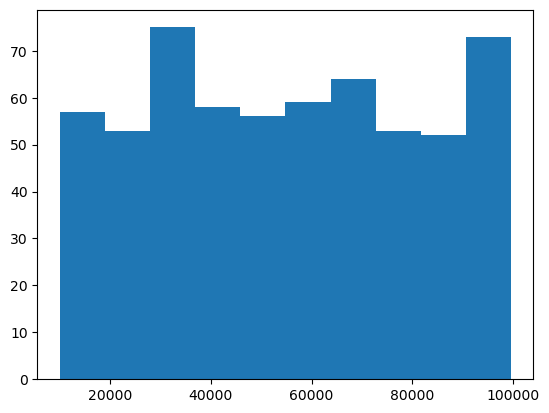

In [12]:
plt.hist('TaxableIncome',data=Fraud_data)
plt.show()

In [13]:
#Converting taxableIncome <= 30000 as "Risky" and others are "Good"

Fraud_data['taxable_category']=pd.cut(x=Fraud_data['TaxableIncome'],bins=[10002,30000,99620],labels=['Risky', 'Good'])

In [14]:
Fraud_data.taxable_category.value_counts()

Good     476
Risky    124
Name: taxable_category, dtype: int64

In [15]:
Fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Undergrad         600 non-null    object  
 1   MaritalStatus     600 non-null    object  
 2   TaxableIncome     600 non-null    int64   
 3   CityPopulation    600 non-null    int64   
 4   WorkExperience    600 non-null    int64   
 5   Urban             600 non-null    object  
 6   taxable_category  600 non-null    category
dtypes: category(1), int64(3), object(3)
memory usage: 29.0+ KB


In [16]:
categorical_features=Fraud_data.describe(include=["object",'category']).columns
categorical_features

Index(['Undergrad', 'MaritalStatus', 'Urban', 'taxable_category'], dtype='object')

In [17]:
numerical_features=Fraud_data.describe(include=["int64","float64"]).columns
numerical_features

Index(['TaxableIncome', 'CityPopulation', 'WorkExperience'], dtype='object')

In [18]:
from scipy import stats

# Calculate Z-scores for each specified column
z_scores=pd.DataFrame()
for column in numerical_features:
    z_scores[column] = np.abs(stats.zscore(Fraud_data[column]))

# Define a threshold for identifying outliers (e.g., Z-score greater than 3)
threshold=3

# Identify outliers based on the threshold
outliers=(z_scores > threshold)

# Count the number of outliers in each column
outlier_counts=outliers.sum()

# Print the columns with the number of outliers
print("Number of outliers in each column:")
print(outlier_counts)

Number of outliers in each column:
TaxableIncome     0
CityPopulation    0
WorkExperience    0
dtype: int64


#### Data Visulaization

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

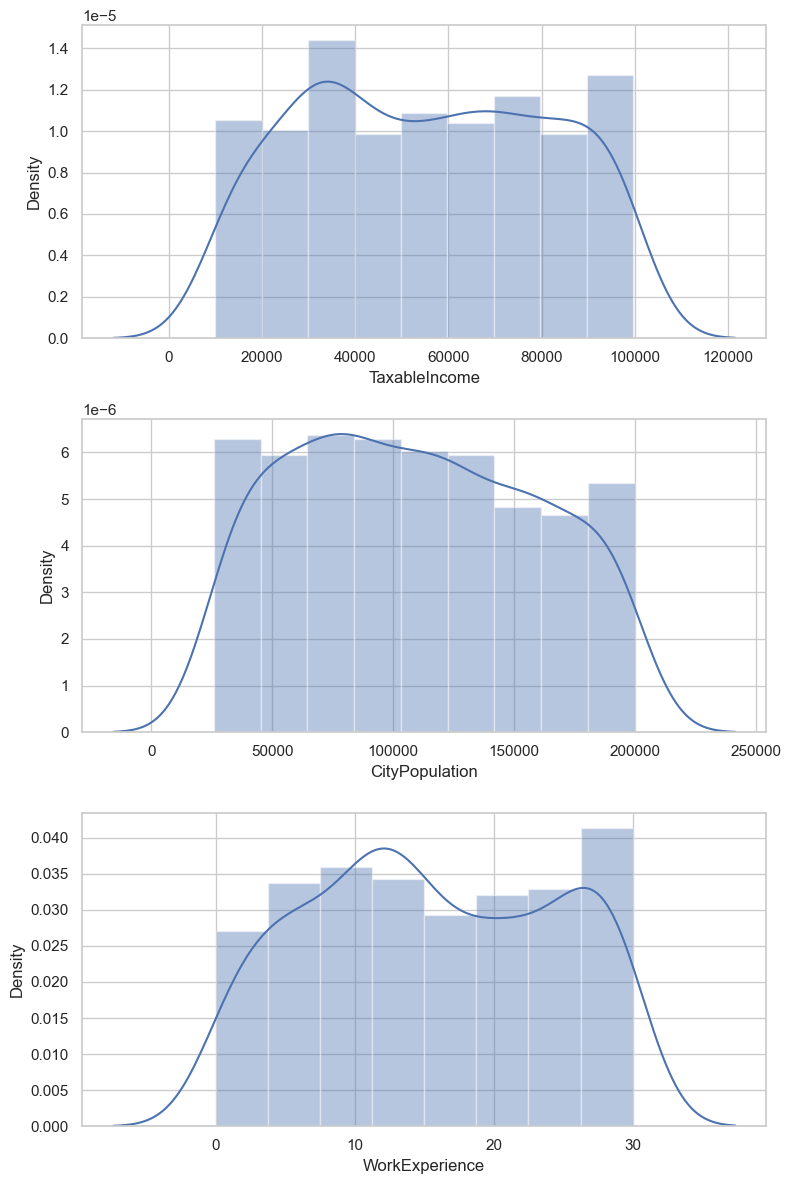

In [19]:
# Set the style for the plots (optional but can enhance the appearance)
sns.set(style="whitegrid")

# Create subplots for each numerical feature
fig,axes=plt.subplots(nrows=len(numerical_features),ncols=1,figsize=(8,12))
for i,column in enumerate(numerical_features):
    sns.distplot(Fraud_data[column],ax=axes[i],kde=True)  # Create a distplot for the current column
    axes[i].set_xlabel(column)  # Set the x-axis label for the current subplot

plt.tight_layout()  # Adjust subplot layout for readability
plt.show()

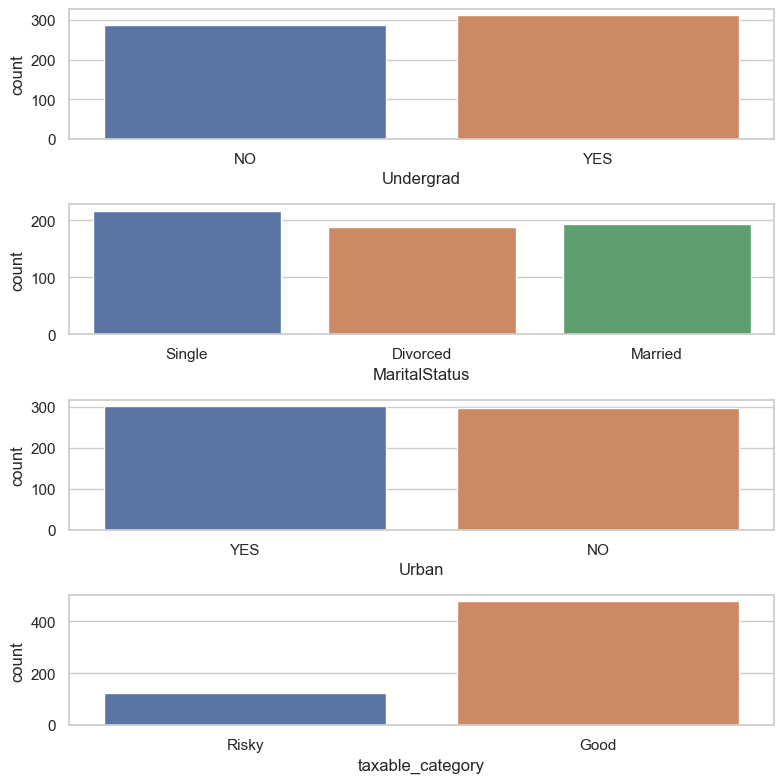

In [20]:
# Set the style for the plots (optional but can enhance the appearance)
sns.set(style="whitegrid")

# Create subplots for each categorical feature
fig,axes=plt.subplots(nrows=len(categorical_features),ncols=1,figsize=(8,8))
for i,column in enumerate(categorical_features):
    sns.countplot(data=Fraud_data,x=column,ax=axes[i])  # Create a count plot for the current column
    axes[i].set_xlabel(column)  # Set the x-axis label for the current subplot

plt.tight_layout()  # Adjust subplot layout for readability
plt.show()

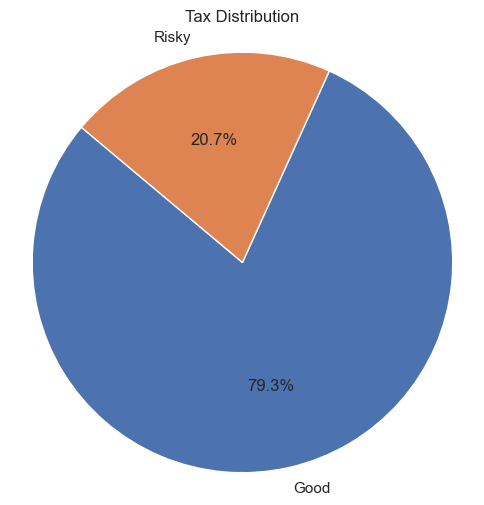

In [21]:
# Calculate the distribution of 'SalesCategory' values
category_counts=Fraud_data['taxable_category'].value_counts()

# Extract labels and sizes for the pie chart
labels=category_counts.index
sizes=category_counts.values

# Create a pie chart
plt.figure(figsize=(6,6))
plt.pie(sizes,labels=labels,autopct='%1.1f%%',startangle=140)
plt.title('Tax Distribution')

# Display the pie chart
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular
plt.show()

<AxesSubplot:>

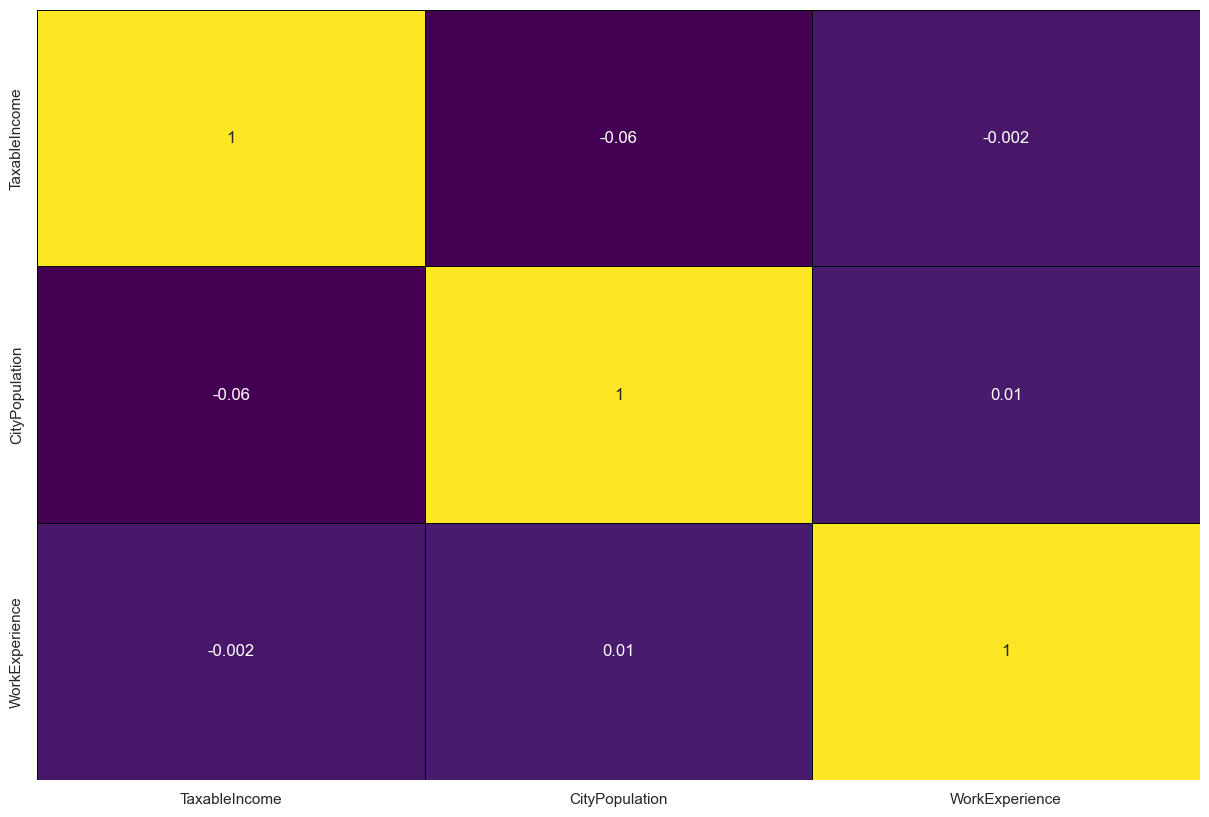

In [22]:
fig,ax=plt.subplots(figsize=(15,10))
sns.heatmap(Fraud_data.corr(),annot=True,fmt='.1g',cmap="viridis",cbar=False,linewidths=0.5,linecolor='black')

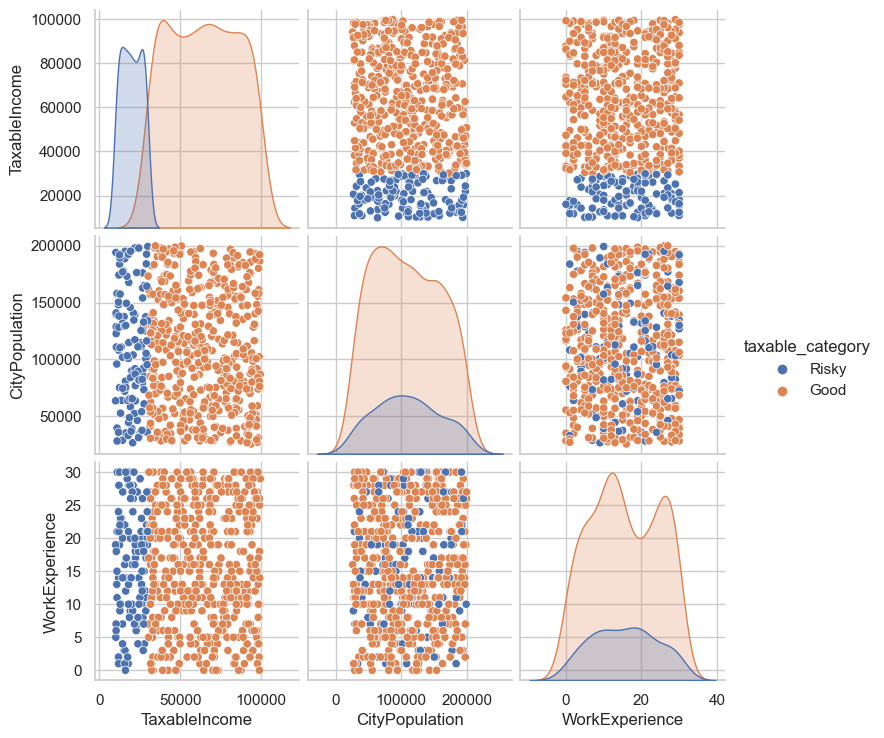

In [23]:
# let's plot pair plot to visualise the attributes all at once
sns.pairplot(data=Fraud_data,hue='taxable_category')

#### Feature Engineering

In [24]:
Fraud_data.drop(columns=['TaxableIncome'],inplace=True)

In [25]:
Fraud_data.columns

Index(['Undergrad', 'MaritalStatus', 'CityPopulation', 'WorkExperience',
       'Urban', 'taxable_category'],
      dtype='object')

In [26]:
# Rename the 'taxable_category' column to 'Tax'
Fraud_data=Fraud_data.rename(columns={'taxable_category': 'Tax'})

In [27]:
Fraud_data.head(2)

Undergrad MaritalStatus  CityPopulation  WorkExperience Urban   Tax
0        NO        Single           50047              10   YES  Good
1       YES      Divorced          134075              18   YES  Good

In [28]:
# Perform one-hot encoding
Fraud_data=pd.get_dummies(Fraud_data,columns=['Undergrad','MaritalStatus','Urban'])

In [29]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder=LabelEncoder()

# Apply label encoding to the categorical column
Fraud_data['Tax']=label_encoder.fit_transform(Fraud_data['Tax'])

In [30]:
Fraud_data.columns

Index(['CityPopulation', 'WorkExperience', 'Tax', 'Undergrad_NO',
       'Undergrad_YES', 'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'Urban_NO', 'Urban_YES'],
      dtype='object')

In [31]:
from sklearn.ensemble import RandomForestClassifier


X=Fraud_data[['CityPopulation', 'WorkExperience', 'Undergrad_NO',
       'Undergrad_YES', 'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'Urban_NO', 'Urban_YES']]
y=Fraud_data['Tax']

# Initialize the Random Forest classifier
clf=RandomForestClassifier()

# Fit the model on your data
clf.fit(X,y)

# Get feature importances
feature_importances=clf.feature_importances_

# Create a dictionary mapping feature names to their importances
feature_importance_dict=dict(zip(X.columns,feature_importances))

# Sort the features by their importance
sorted_features=sorted(feature_importance_dict.items(),key=lambda x: x[1],reverse=True)

# Print the features and their importances
for feature, importance in sorted_features:
    print(f"Feature: {feature}, Importance: {importance}")

Feature: CityPopulation, Importance: 0.5473895043808854
Feature: WorkExperience, Importance: 0.3344599676738482
Feature: Undergrad_NO, Importance: 0.018148265091619088
Feature: Undergrad_YES, Importance: 0.01789789179786686
Feature: MaritalStatus_Married, Importance: 0.016859117638015588
Feature: Urban_NO, Importance: 0.01678117531897073
Feature: Urban_YES, Importance: 0.01649105480036469
Feature: MaritalStatus_Divorced, Importance: 0.01627314165202422
Feature: MaritalStatus_Single, Importance: 0.015699881646405078


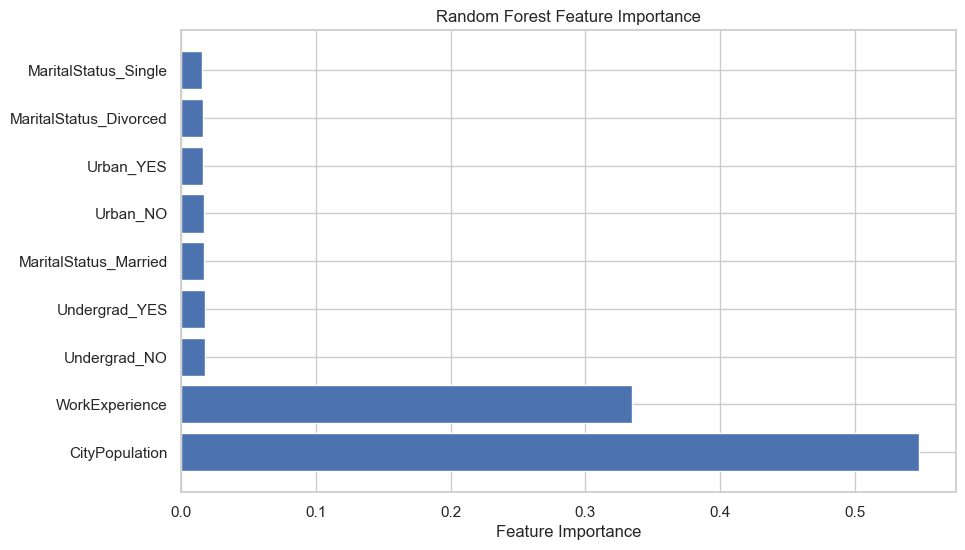

In [32]:
# Extract feature names and their importances
features, importances = zip(*sorted_features)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(range(len(features)), importances, align='center')
plt.yticks(range(len(features)), features)
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.show()

#### Model Building, Training & Prediction

In [33]:
model_data=Fraud_data[['CityPopulation', 'WorkExperience', 'Tax', 'Undergrad_NO',
       'Undergrad_YES', 'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'Urban_NO', 'Urban_YES']]

In [34]:
x=model_data.drop('Tax',axis=1)
y=model_data['Tax']

In [35]:
from collections import Counter
from imblearn.over_sampling import SMOTE,  ADASYN
from imblearn.combine import SMOTETomek, SMOTEENN
from imblearn.under_sampling import RandomUnderSampler
from sklearn import tree
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report,confusion_matrix,accuracy_score, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold, cross_val_score, train_test_split, RandomizedSearchCV

In [36]:
# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

# enumerate the splits and summarize the distributions
for train_ix, test_ix in skf.split(x, y):
# select rows
    train_X, test_X = x.iloc[train_ix], x.loc[test_ix]
    train_y, test_y = y.iloc[train_ix], y.iloc[test_ix]
# summarize train and test composition
counter_train = Counter(train_y)
counter_test = Counter(test_y)
print('Training Data',counter_train,'Testing Data',counter_test)

Training Data Counter({0: 429, 1: 111}) Testing Data Counter({0: 47, 1: 13})


In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0,stratify=y)

In [38]:
# summarize train and test composition
counter_train=Counter(y_train)
counter_test=Counter(y_test)
print('Training Data',counter_train,'Testing Data',counter_test)

Training Data Counter({0: 333, 1: 87}) Testing Data Counter({0: 143, 1: 37})


In [39]:
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (420, 9)
Shape of X_test:  (180, 9)
Shape of y_train:  (420,)
Shape of y_test (180,)


Stratify parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify.
For example, if variable y is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, stratify=y will make sure that your random split has 25% of 0's and 75% of 1's.

In machine learning, when we want to train our ML model we split our entire dataset into training_set and test_set using train_test_split() class present in sklearn. Then we train our model on training_set and test our model on test_set. The problems that we are going to face in this method are:

Whenever we change the random_state parameter present in train_test_split(), We get different accuracy for different random_state and hence we can’t exactly point out the accuracy for our model. The train_test_split() splits the dataset into training_test and test_set by random sampling. But stratified sampling is performed.

What are random sampling and Stratified sampling? Suppose you want to take a survey and decided to call 1000 people from a particular state, If you pick either 1000 males completely or 1000 females completely or 900 females and 100 males (randomly) to ask their opinion on a particular product. Then based on these 1000 opinions you can’t decide the opinion of that entire state on your product. This is random sampling. But in Stratified Sampling, Let the population for that state be 51.3% male and 48.7% female, Then for choosing 1000 people from that state if you pick 513 male ( 51.3% of 1000 ) and 487 female ( 48.7% for 1000 ) i.e 513 male + 487 female (Total=1000 people) to ask their opinion. Then these groups of people represent the entire state. This is called Stratified Sampling.

Why random sampling is not preferred in machine learning? Let’s consider a binary-class classification problem. Let our dataset consists of 100 samples out of which 80 are negative class { 0 } and 20 are positive class { 1 }.

Random sampling: If we do random sampling to split the dataset into training_set and test_set in an 8:2 ratio respectively.Then we might get all negative class {0} in training_set i.e 80 samples in training_test and all 20 positive class {1} in test_set.Now if we train our model on training_set and test our model on test_set, Then obviously we will get a bad accuracy score.

Stratified Sampling: In stratified sampling, The training_set consists of 64 negative class{0} ( 80% 0f 80 ) and 16 positive class {1} ( 80% of 20 ) i.e. 64{0}+16{1}=80 samples in training_set which represents the original dataset in equal proportion and similarly test_set consists of 16 negative class {0} ( 20% of 80 ) and 4 positive class{1} ( 20% of 20 ) i.e. 16{0}+4{1}=20 samples in test_set which also represents the entire dataset in equal proportion.This type of train-test-split results in good accuracy.

What is the solution to mentioned problems? The solution for the first problem where we were able to get different accuracy scores for different random_state parameter values is to use K-Fold Cross-Validation. But K-Fold Cross Validation also suffers from the second problem i.e. random sampling. The solution for both the first and second problems is to use Stratified K-Fold Cross-Validation.

What is Stratified K-Fold Cross Validation? Stratified k-fold cross-validation is the same as just k-fold cross-validation, But Stratified k-fold cross-validation, it does stratified sampling instead of random sampling.

For Reference : https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6

#### Grid search using Stratified Kfold Splits on Imbalanced Dataset

In [40]:
def print_score(clf,x_train,y_train,x_test,y_test,train=True):
    if train:
        pred=clf.predict(x_train)
        clf_report=pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred=clf.predict(x_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [41]:
rf_clf=RandomForestClassifier(n_estimators=100)
rf_clf.fit(train_X,train_y)

print_score(rf_clf, train_X, train_y, test_X, test_y, train=True)
print_score(rf_clf, train_X, train_y, test_X, test_y, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    429.0  111.0       1.0      540.0         540.0
_______________________________________________
Confusion Matrix: 
 [[429   0]
 [  0 111]]

Test Result:
Accuracy Score: 71.67%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.777778   0.166667  0.716667   0.472222      0.645370
recall      0.893617   0.076923  0.716667   0.485270      0.716667
f1-score    0.831683   0.105263  0.716667   0.468473      0.674292
support    47.000000  13.000000  0.716667  60.000000     60.000000
_______________________________________________
Confusion Matr

#### Grid search using Train Test Splits Stratifying Target feature on Imbalanced Dataset

In [42]:
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(x_train, y_train)

print_score(rf_clf, x_train, y_train, x_test, y_test, train=True)
print_score(rf_clf, x_train, y_train, x_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision    1.0   1.0       1.0        1.0           1.0
recall       1.0   1.0       1.0        1.0           1.0
f1-score     1.0   1.0       1.0        1.0           1.0
support    333.0  87.0       1.0      420.0         420.0
_______________________________________________
Confusion Matrix: 
 [[333   0]
 [  0  87]]

Test Result:
Accuracy Score: 73.89%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.785714   0.083333  0.738889    0.434524      0.641336
recall       0.923077   0.027027  0.738889    0.475052      0.738889
f1-score     0.848875   0.040816  0.738889    0.444845      0.682774
support    143.000000  37.000000  0.738889  180.000000    180.000000
_______________________________________________
Confusion

In both the condition, due to imbalanced dataset our results are getting biased towards the majority. The model is correctly classifying all the majority classes yet fails to classify the minority classes. Hence, we need to use some kind of oversampling techniques to balance the dataset.

#### Handling imbalance data using SMOTE based techniques

Resampling data is one of the most commonly preferred approaches to deal with an imbalanced dataset. There are broadly two types of methods for this i) Undersampling ii) Oversampling. In most cases, oversampling is preferred over undersampling techniques. The reason being, in undersampling we tend to remove instances from data that may be carrying some important information. In this article, I am specifically covering some special data augmentation oversampling techniques: SMOTE and its related counterparts.
SMOTE: Synthetic Minority Oversampling Technique
SMOTE is an oversampling technique where the synthetic samples are generated for the minority class. This algorithm helps to overcome the overfitting problem posed by random oversampling. It focuses on the feature space to generate new instances with the help of interpolation between the positive instances that lie together.

Working Procedure:

At first the total no. of oversampling observations, N is set up. Generally, it is selected such that the binary class distribution is 1:1. But that could be tuned down based on need. Then the iteration starts by first selecting a positive class instance at random. Next, the KNN’s (by default 5) for that instance is obtained. At last, N of these K instances is chosen to interpolate new synthetic instances. To do that, using any distance metric the difference in distance between the feature vector and its neighbors is calculated. Now, this difference is multiplied by any random value in (0,1] and is added to the previous feature vector. This is pictorially represented below:
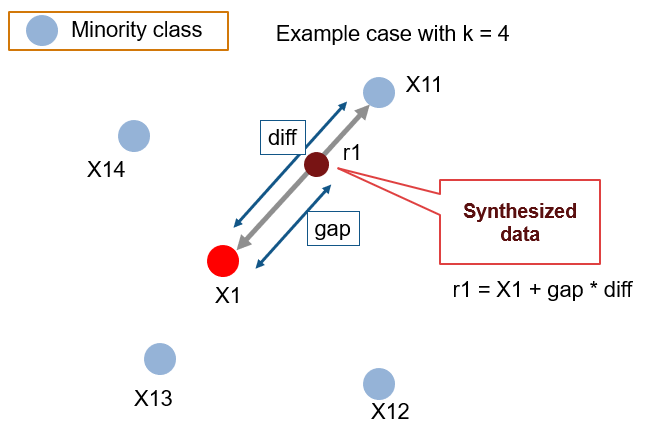

Though this algorithm is quite useful, it has few drawbacks associated with it.

i) The synthetic instances generated are in the same direction i.e. connected by an artificial line its diagonal instances. This in turn complicates the decision surface generated by few classifier algorithms.

ii) SMOTE tends to create a large no. of noisy data points in feature space.

#### SMOTE Oversampling technique

In [43]:
counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE
smt = SMOTE()
x_train_sm, y_train_sm = smt.fit_resample(x_train, y_train)

counter = Counter(y_train_sm)
print('After',counter)

Before Counter({0: 333, 1: 87})
After Counter({0: 333, 1: 333})


#### ADASYN: Adaptive Synthetic Sampling Approach

ADASYN is a generalized form of the SMOTE algorithm. This algorithm also aims to oversample the minority class by generating synthetic instances for it. But the difference here is it considers the density distribution, ri which decides the no. of synthetic instances generated for samples which difficult to learn. Due to this, it helps in adaptively changing the decision boundaries based on the samples difficult to learn. This is the major difference compared to SMOTE.

Working Procedure: From the dataset, the total no. of majority N– and minority N+ are captured respectively. Then we preset the threshold value, dth for the maximum degree of class imbalance. Total no. of synthetic samples to be generated, G = (N– – N+) x β. Here, β = (N+/ N–).
For every minority sample xi, KNN’s are obtained using Euclidean distance, and ratio ri is calculated as Δi/k and further normalized as rx <= ri / ∑ rᵢ .
Thereafter, the total synthetic samples for each xi will be, gi = rx x G. Now we iterate from 1 to gi to generate samples the same way as we did in SMOTE.
The below-given diagram represents the above procedure:
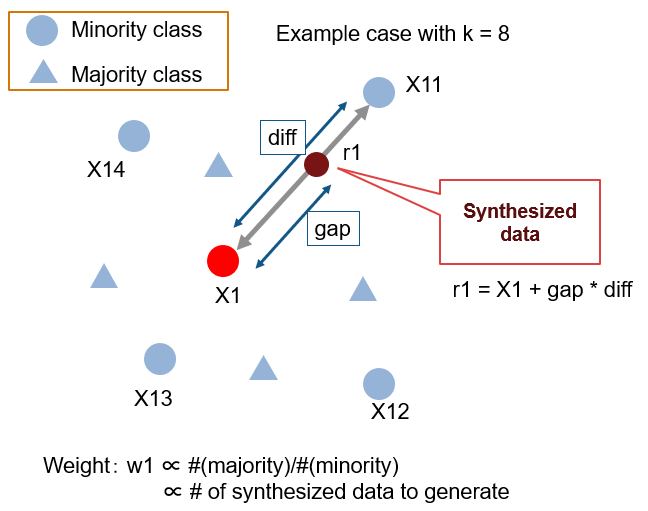

In [44]:
counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using ADASYN
ada = ADASYN(random_state=130)
x_train_ada, y_train_ada = ada.fit_resample(x_train, y_train)

counter = Counter(y_train_ada)
print('After',counter)

Before Counter({0: 333, 1: 87})
After Counter({0: 333, 1: 327})


#### Hybridization: SMOTE + Tomek Links

Hybridization techniques involve combining both undersampling and oversampling techniques. This is done to optimize the performance of classifier models for the samples created as part of these techniques.

SMOTE+TOMEK is such a hybrid technique that aims to clean overlapping data points for each of the classes distributed in sample space. After the oversampling is done by SMOTE, the class clusters may be invading each other’s space. As a result, the classifier model will be overfitting. Now, Tomek links are the opposite class paired samples that are the closest neighbors to each other. Therefore the majority of class observations from these links are removed as it is believed to increase the class separation near the decision boundaries. Now, to get better class clusters, Tomek links are applied to oversampled minority class samples done by SMOTE. Thus instead of removing the observations only from the majority class, we generally remove both the class observations from the Tomek links

In [45]:
counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE + Tomek
smtom = SMOTETomek(random_state=139)
x_train_smtom, y_train_smtom = smtom.fit_resample(x_train, y_train)

counter = Counter(y_train_smtom)
print('After',counter)

Before Counter({0: 333, 1: 87})
After Counter({0: 239, 1: 239})


#### Hybridization: SMOTE + ENN

SMOTE + ENN is another hybrid technique where more no. of observations are removed from the sample space. Here, ENN is yet another undersampling technique where the nearest neighbors of each of the majority class is estimated. If the nearest neighbors misclassify that particular instance of the majority class, then that instance gets deleted.

Integrating this technique with oversampled data done by SMOTE helps in doing extensive data cleaning. Here on misclassification by NN’s samples from both the classes are removed. This results in a more clear and concise class separation.

In [46]:
counter = Counter(y_train)
print('Before',counter)
#oversampling the train dataset using SMOTE + ENN
smenn = SMOTEENN()
x_train_smenn, y_train_smenn = smenn.fit_resample(x_train, y_train)

counter = Counter(y_train_smenn)
print('After',counter)

Before Counter({0: 333, 1: 87})
After Counter({1: 99, 0: 93})


The below-given picture shows how different SMOTE based resampling techniques work out to deal with imbalanced data.
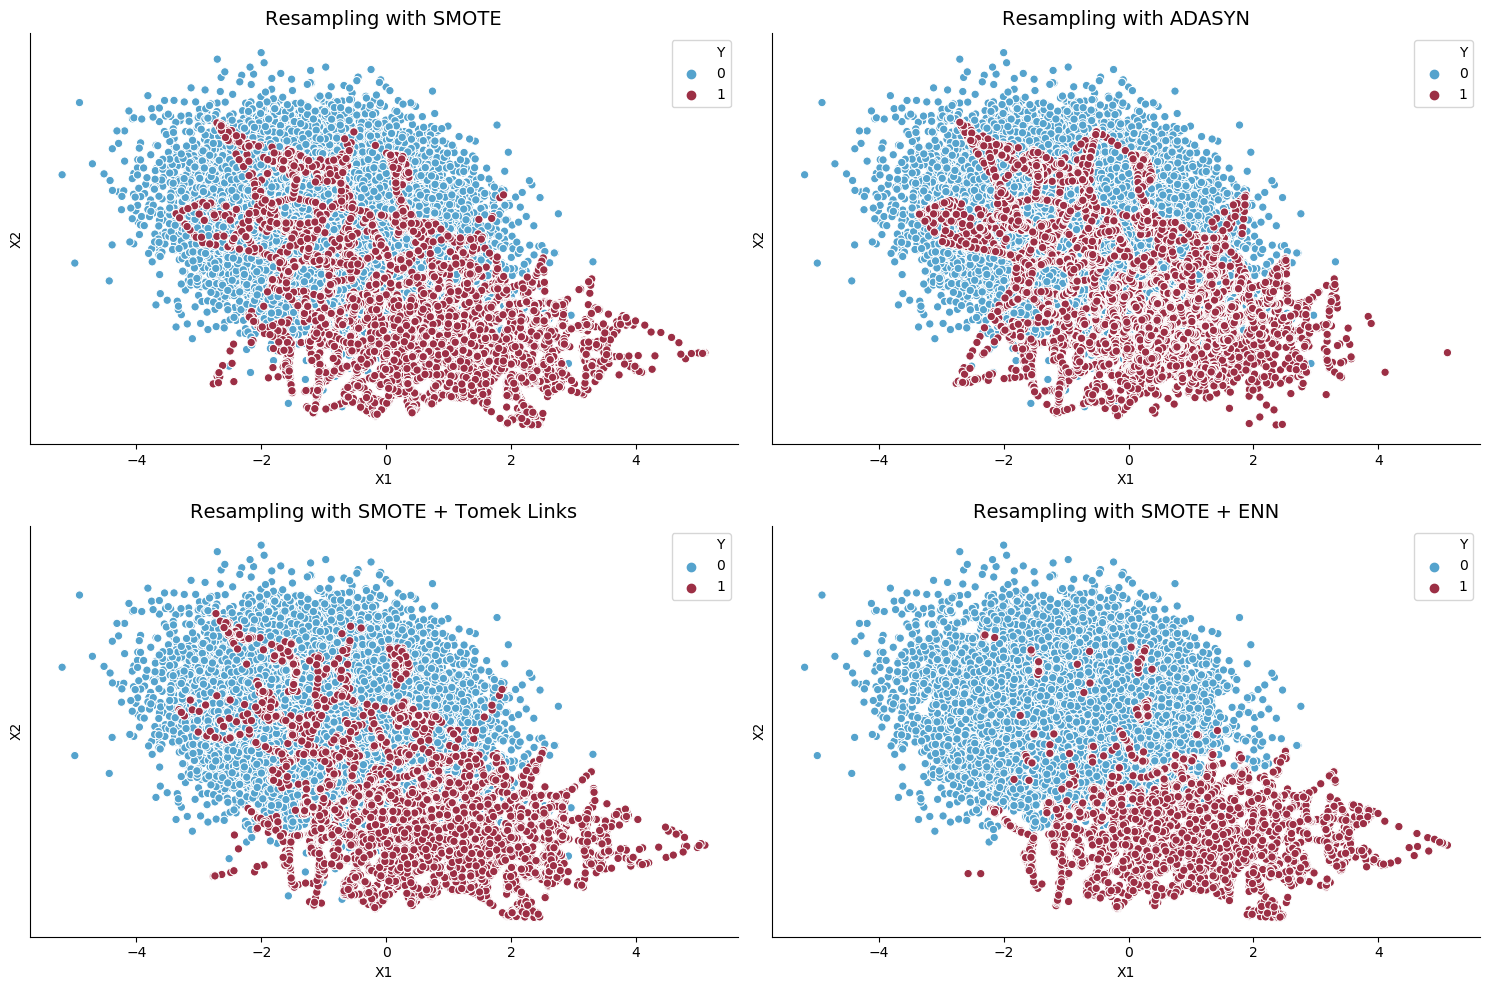

#### Performance Analysis after Resampling

In [47]:
sampled_data = {
    'ACTUAL':[x_train, y_train],
    'SMOTE':[x_train_sm, y_train_sm],
    'ADASYN':[x_train_ada, y_train_ada],
    'SMOTE_TOMEK':[x_train_smtom, y_train_smtom],
    'SMOTE_ENN':[x_train_smenn, y_train_smenn]
}

In [48]:
def test_eval(clf_model, X_test, y_test, algo=None, sampling=None):
    # Test set prediction
    y_prob=clf_model.predict_proba(X_test)
    y_pred=clf_model.predict(X_test)

    print('Confusion Matrix')
    print('='*60)
    #plot_confusion_matrix(clf_model, X_test, y_test)  
    #plt.show() 
    print(confusion_matrix(y_test,y_pred),"\n")
    print('Classification Report')
    print('='*60)
    print(classification_report(y_test,y_pred),"\n")
    #print('AUC-ROC')
    #print('='*60)
    #print(roc_auc_score(y_test, y_prob[:,1], multi_class='ovo'))
    
    #x = roc_auc_score(y_test, y_prob[:,1])
    f1 = f1_score(y_test, y_pred, average='micro')
    recall = recall_score(y_test, y_pred, average='micro')
    precision = precision_score(y_test, y_pred, average='micro')
          
    
    return algo,precision,recall,f1,sampling

In [49]:
model_params = {

    'random-forest' : {
        'model' : RandomForestClassifier(),
        'params' : {
             "n_estimators": [5, 10, 15, 20, 25], 
             'max_depth': [i for i in range(5,16,2)],
             'min_samples_split': [2, 5, 10, 15, 20, 50, 100],
             'min_samples_leaf': [1, 2, 5],
             'criterion': ['gini', 'entropy'],
             'max_features': ['log2', 'sqrt', 'auto']

         }
    }
}

In [50]:
cv = StratifiedKFold(n_splits=10, random_state=100, shuffle=True)
output = []
for model , model_hp in model_params.items():
    for resam , data in sampled_data.items():
        clf = RandomizedSearchCV(model_hp['model'], model_hp['params'],cv = cv, scoring='roc_auc', n_jobs=-1 )
        clf.fit(data[0], data[1])
        clf_best = clf.best_estimator_
        print('x'*60)
        print(model+' with ' + resam)
        print('='*60)
        output.append(test_eval(clf_best, x_test, y_test, model, resam))

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
random-forest with ACTUAL
Confusion Matrix
[[143   0]
 [ 37   0]] 

Classification Report
              precision    recall  f1-score   support

           0       0.79      1.00      0.89       143
           1       0.00      0.00      0.00        37

    accuracy                           0.79       180
   macro avg       0.40      0.50      0.44       180
weighted avg       0.63      0.79      0.70       180
 



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
random-forest with SMOTE
Confusion Matrix
[[131  12]
 [ 33   4]] 

Classification Report
              precision    recall  f1-score   support

           0       0.80      0.92      0.85       143
           1       0.25      0.11      0.15        37

    accuracy                           0.75       180
   macro avg       0.52      0.51      0.50       180
weighted avg       0.69      0.75      0.71       180
 

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
random-forest with ADASYN
Confusion Matrix
[[132  11]
 [ 33   4]] 

Classification Report
              precision    recall  f1-score   support

           0       0.80      0.92      0.86       143
           1       0.27      0.11      0.15        37

    accuracy                           0.76       180
   macro avg       0.53      0.52      0.51       180
weighted avg       0.69      0.76      0.71       180
 

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

In [51]:
counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using ADASYN
ada = ADASYN(random_state=130)
x_train_ada, y_train_ada = ada.fit_resample(x_train, y_train)

counter = Counter(y_train_ada)
print('After',counter)

Before Counter({0: 333, 1: 87})
After Counter({0: 333, 1: 327})


In [52]:
x_train,x_test,y_train,y_test = train_test_split(x_train_ada,y_train_ada,test_size=0.3,random_state=0, stratify=y_train_ada)

counter = Counter(y_train)
print('Train',counter)
counter = Counter(y_test)
print('Test',counter)
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Train Counter({0: 233, 1: 229})
Test Counter({0: 100, 1: 98})
Shape of X_train:  (462, 9)
Shape of X_test:  (198, 9)
Shape of y_train:  (462,)
Shape of y_test (198,)


#### Random Forest hyperparameter tuning

In [53]:
score_array = []
for each in range(1,200):
    rf_loop = RandomForestClassifier(n_estimators = each, random_state = 1) 
    rf_loop.fit(x_train,y_train)
    score_array.append(rf_loop.score(x_test,y_test))

In [54]:
loc = np.array(score_array).max()
score_array.index(loc)+1

12

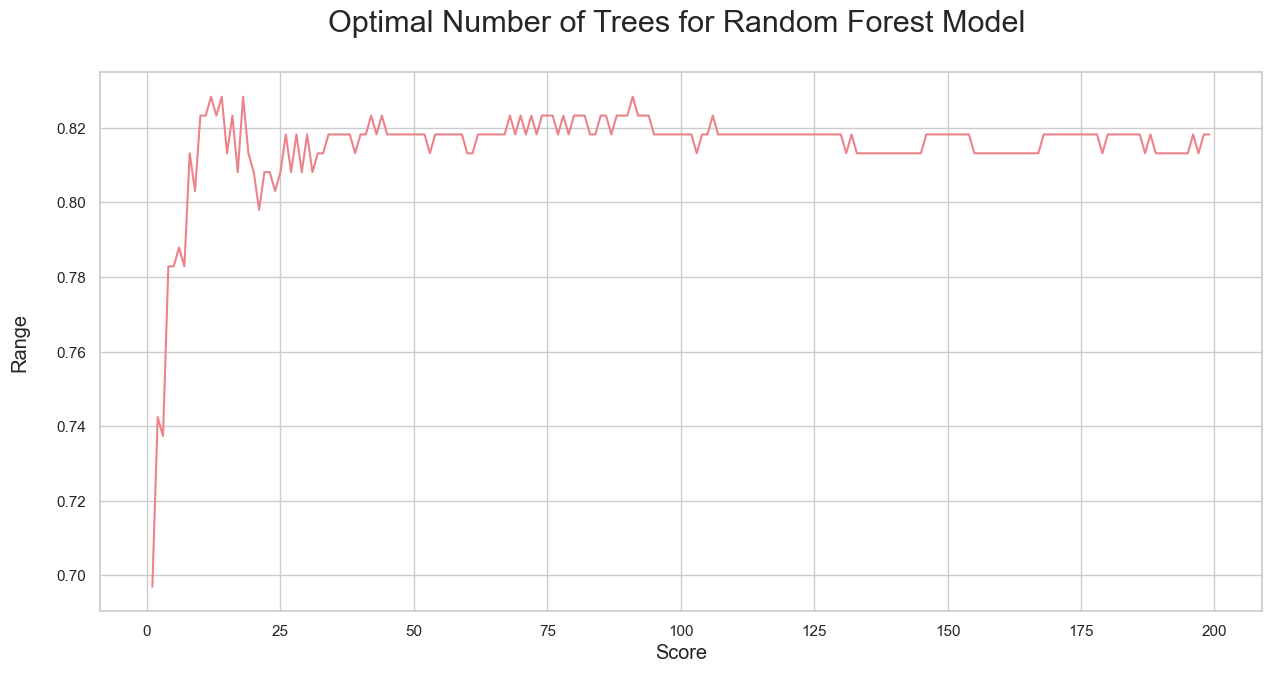

In [55]:
fig = plt.figure(figsize=(15, 7))
plt.plot(range(1,200),score_array, color = '#ec838a')
plt.ylabel('Range\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.xlabel('Score\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.title('Optimal Number of Trees for Random Forest Model \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
#plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

#### Randomized Search Cross Validation

In [56]:
n_estimators = [int(x) for x in np.linspace(start=0, stop=200, num=200)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf = RandomForestClassifier(random_state=42)

rf_cv = RandomizedSearchCV(estimator=rf_clf, scoring='f1',param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)

rf_cv.fit(x_train, y_train)
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")

rf_clf = RandomForestClassifier(**rf_best_params)
rf_clf.fit(x_train, y_train)

print_score(rf_clf, x_train, y_train, x_test, y_test, train=True)
print_score(rf_clf, x_train, y_train, x_test, y_test, train=False)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'n_estimators': 44, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 110, 'bootstrap': True})
Train Result:
Accuracy Score: 96.54%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.939271    0.995349  0.965368    0.967310      0.967067
recall       0.995708    0.934498  0.965368    0.965103      0.965368
f1-score     0.966667    0.963964  0.965368    0.965315      0.965327
support    233.000000  229.000000  0.965368  462.000000    462.000000
_______________________________________________
Confusion Matrix: 
 [[232   1]
 [ 15 214]]

Test Result:
Accuracy Score: 83.84%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.798246   0.892857  0.838384    0.845551      0.845

#### Grid Search Cross Validation

In [57]:
 # Create a pipeline with a Random forest classifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (FunctionTransformer, StandardScaler)
from time import time
    
pipe_rfc = Pipeline([ 
                      ('scl', StandardScaler()), 
                    ('rfc', RandomForestClassifier(random_state=0, n_jobs=-1) )])

# Set the grid parameters
param_grid_rfc =  [ {
    'rfc__n_estimators': [100, 200,300,400], # number of estimators
    #'rfc__criterion': ['gini', 'entropy'],   # Splitting criterion
    'rfc__max_features':[0.05 , 0.1], # maximum features used at each split
    'rfc__max_depth': [None, 5], # Max depth of the trees
    'rfc__min_samples_split': [0.005, 0.01], # mininal samples in leafs
    }]
# Use 10 fold CV
kfold = StratifiedKFold(n_splits=10, shuffle=True,random_state= 0)
grid_rfc = GridSearchCV(pipe_rfc, param_grid= param_grid_rfc, cv=kfold, scoring='f1', verbose= 1, n_jobs=-1)

#Fit the pipeline
start = time()
grid_rfc = grid_rfc.fit(x_train, y_train)
end = time()

print("RFC grid search took %.3f seconds" %(end-start))

# Best score and best parameters
print('-------Best score----------')
print(grid_rfc.best_score_ * 100.0)
print('-------Best params----------')
print(grid_rfc.best_params_)

Fitting 10 folds for each of 32 candidates, totalling 320 fits
RFC grid search took 63.762 seconds
-------Best score----------
78.57698496036312
-------Best params----------
{'rfc__max_depth': None, 'rfc__max_features': 0.05, 'rfc__min_samples_split': 0.005, 'rfc__n_estimators': 200}


###############################################################################################################################

### Questio 2

A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A Random Forest can be built with target variable Sales (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


In [58]:
data=pd.read_csv('Company_Data.csv')
data.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  
2         12   Yes  Yes  
3         14   Yes  Yes  
4         13   Yes   No

**About the data:** 

+ Sales -- Unit sales (in thousands) at each location
+ Competitor Price -- Price charged by competitor at each location
+ Income -- Community income level (in thousands of dollars)
+ Advertising -- Local advertising budget for company at each location (in thousands of dollars)
+ Population -- Population size in region (in thousands)
+ Price -- Price company charges for car seats at each site
+ Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
+ Age -- Average age of the local population
+ Education -- Education level at each location
+ Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
+ US -- A factor with levels No and Yes to indicate whether the store is in the US or not

In [59]:
data.shape

(400, 11)

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [61]:
data.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [62]:
data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [63]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
395    False
396    False
397    False
398    False
399    False
Length: 400, dtype: bool

In [64]:
data.duplicated().sum()

0

In [65]:
data.describe()

Sales   CompPrice      Income  Advertising  Population  \
count  400.000000  400.000000  400.000000   400.000000  400.000000   
mean     7.496325  124.975000   68.657500     6.635000  264.840000   
std      2.824115   15.334512   27.986037     6.650364  147.376436   
min      0.000000   77.000000   21.000000     0.000000   10.000000   
25%      5.390000  115.000000   42.750000     0.000000  139.000000   
50%      7.490000  125.000000   69.000000     5.000000  272.000000   
75%      9.320000  135.000000   91.000000    12.000000  398.500000   
max     16.270000  175.000000  120.000000    29.000000  509.000000   

            Price         Age   Education  
count  400.000000  400.000000  400.000000  
mean   115.795000   53.322500   13.900000  
std     23.676664   16.200297    2.620528  
min     24.000000   25.000000   10.000000  
25%    100.000000   39.750000   12.000000  
50%    117.000000   54.500000   14.000000  
75%    131.000000   66.000000   16.000000  
max    191.000000   80.000000   18.000000

In [66]:
Cloth_Data=data.copy()

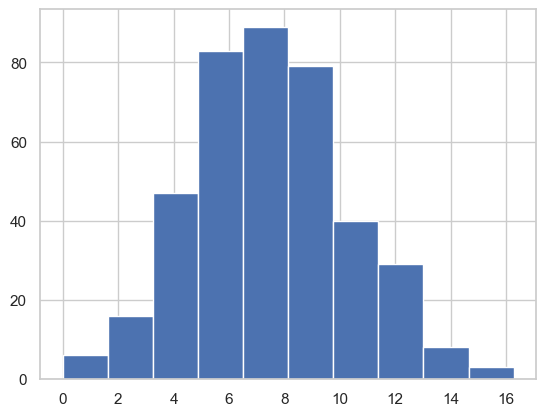

In [67]:
plt.hist('Sales',data=Cloth_Data)
plt.show()

In [68]:
Cloth_Data['SalesCategory']=pd.cut(x=Cloth_Data['Sales'],bins=[0,5.39,9.32,17],labels=['Low','Medium','High'],right = False)

In [69]:
Cloth_Data.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US SalesCategory  
0         17   Yes  Yes          High  
1         10   Yes  Yes          High  
2         12   Yes  Yes          High  
3         14   Yes  Yes        Medium  
4         13   Yes   No           Low

In [70]:
Cloth_Data.SalesCategory.value_counts()

Medium    198
High      102
Low       100
Name: SalesCategory, dtype: int64

In [71]:
Cloth_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Sales          400 non-null    float64 
 1   CompPrice      400 non-null    int64   
 2   Income         400 non-null    int64   
 3   Advertising    400 non-null    int64   
 4   Population     400 non-null    int64   
 5   Price          400 non-null    int64   
 6   ShelveLoc      400 non-null    object  
 7   Age            400 non-null    int64   
 8   Education      400 non-null    int64   
 9   Urban          400 non-null    object  
 10  US             400 non-null    object  
 11  SalesCategory  400 non-null    category
dtypes: category(1), float64(1), int64(7), object(3)
memory usage: 35.0+ KB


In [72]:
categorical_features=Cloth_Data.describe(include=["object",'category']).columns
categorical_features

Index(['ShelveLoc', 'Urban', 'US', 'SalesCategory'], dtype='object')

In [73]:
numerical_features=Cloth_Data.describe(include=["int64","float64"]).columns
numerical_features

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'Age', 'Education'],
      dtype='object')

In [74]:
from scipy import stats

# Calculate Z-scores for each specified column
z_scores=pd.DataFrame()
for column in numerical_features:
    z_scores[column] = np.abs(stats.zscore(Cloth_Data[column]))

# Define a threshold for identifying outliers (e.g., Z-score greater than 3)
threshold=3

# Identify outliers based on the threshold
outliers=(z_scores > threshold)

# Count the number of outliers in each column
outlier_counts=outliers.sum()

# Print the columns with the number of outliers
print("Number of outliers in each column:")
print(outlier_counts)

Number of outliers in each column:
Sales          1
CompPrice      2
Income         0
Advertising    1
Population     0
Price          2
Age            0
Education      0
dtype: int64


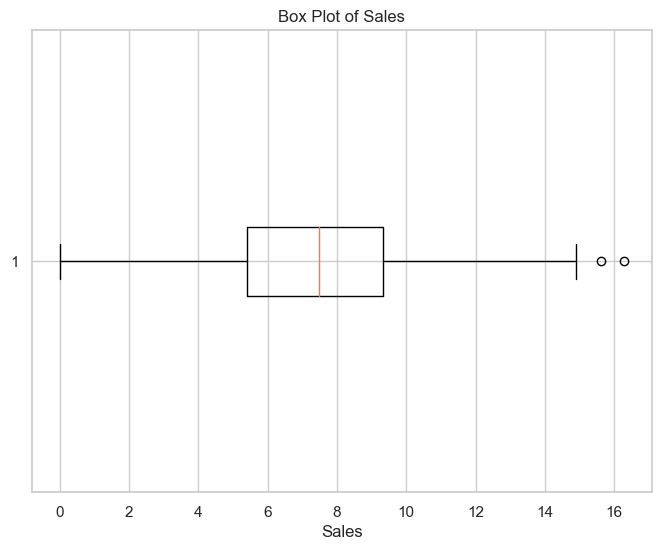

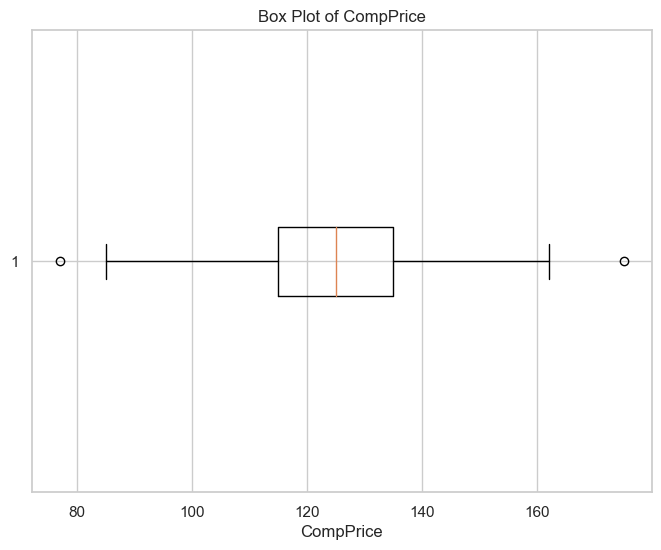

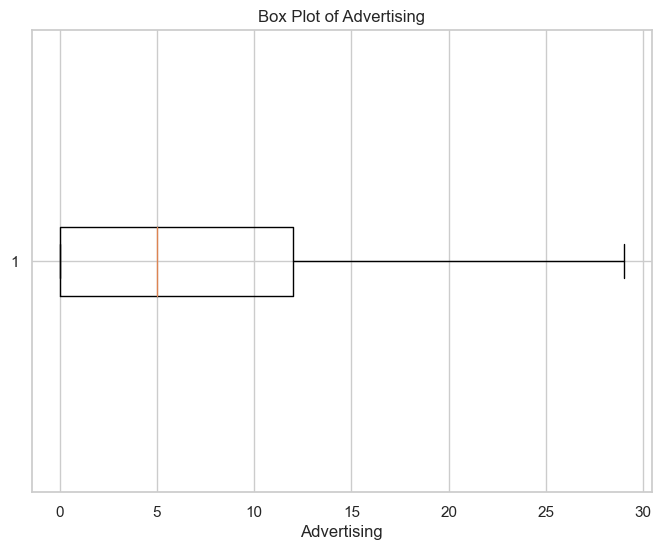

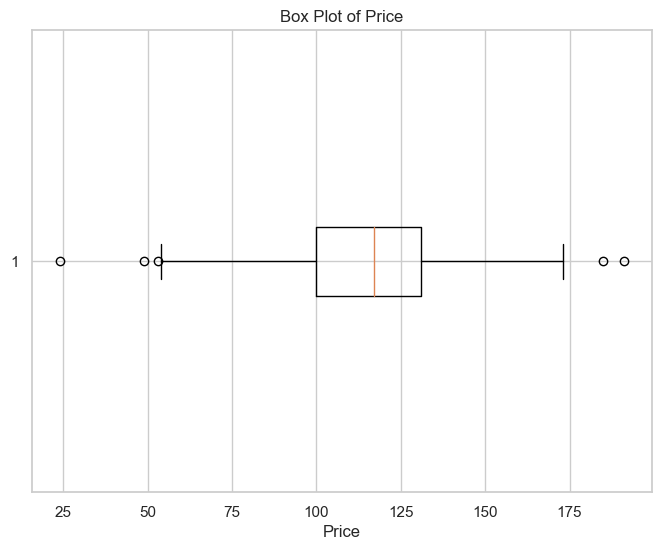

In [75]:
# Define the columns with outliers
columns_with_outliers=["Sales","CompPrice","Advertising","Price"]

# Create box plots for columns with outliers
for column in columns_with_outliers:
    plt.figure(figsize=(8,6))
    plt.boxplot(Cloth_Data[column],vert=False)
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

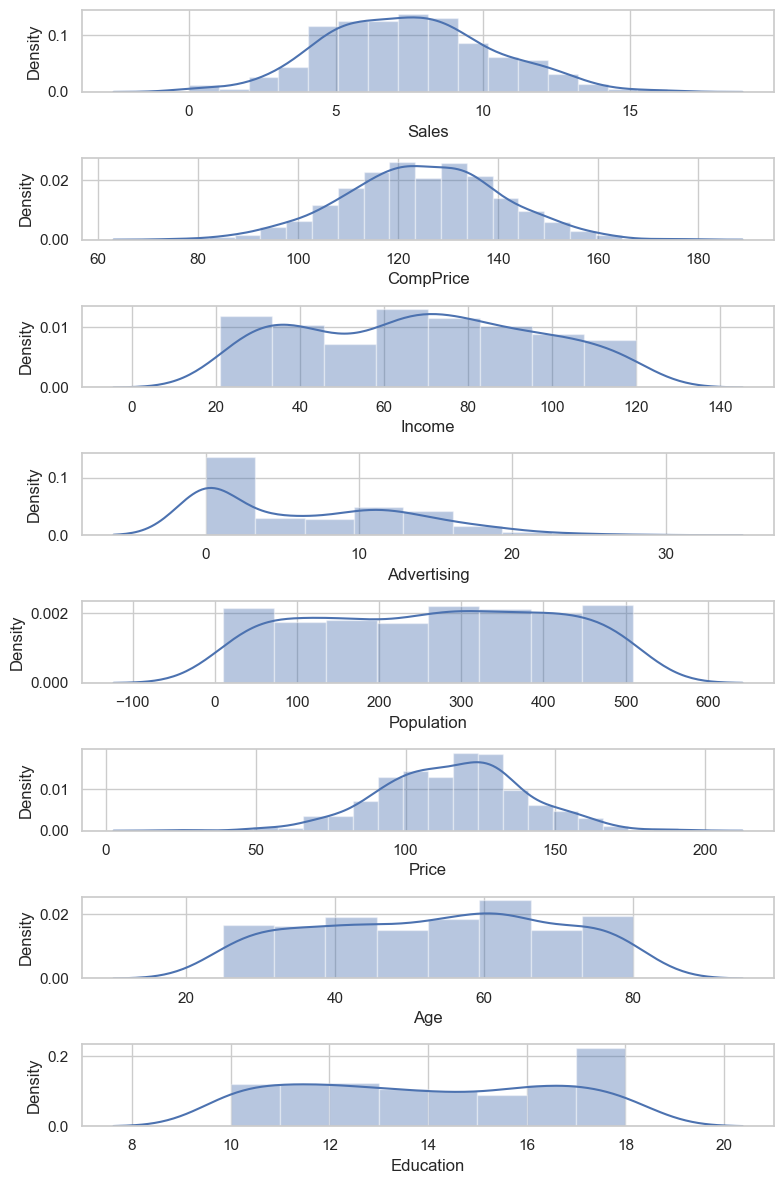

In [76]:
# Set the style for the plots (optional but can enhance the appearance)
sns.set(style="whitegrid")

# Create subplots for each numerical feature
fig,axes=plt.subplots(nrows=len(numerical_features),ncols=1,figsize=(8,12))
for i,column in enumerate(numerical_features):
    sns.distplot(Cloth_Data[column],ax=axes[i],kde=True)  # Create a distplot for the current column
    axes[i].set_xlabel(column)  # Set the x-axis label for the current subplot

plt.tight_layout()  # Adjust subplot layout for readability
plt.show()

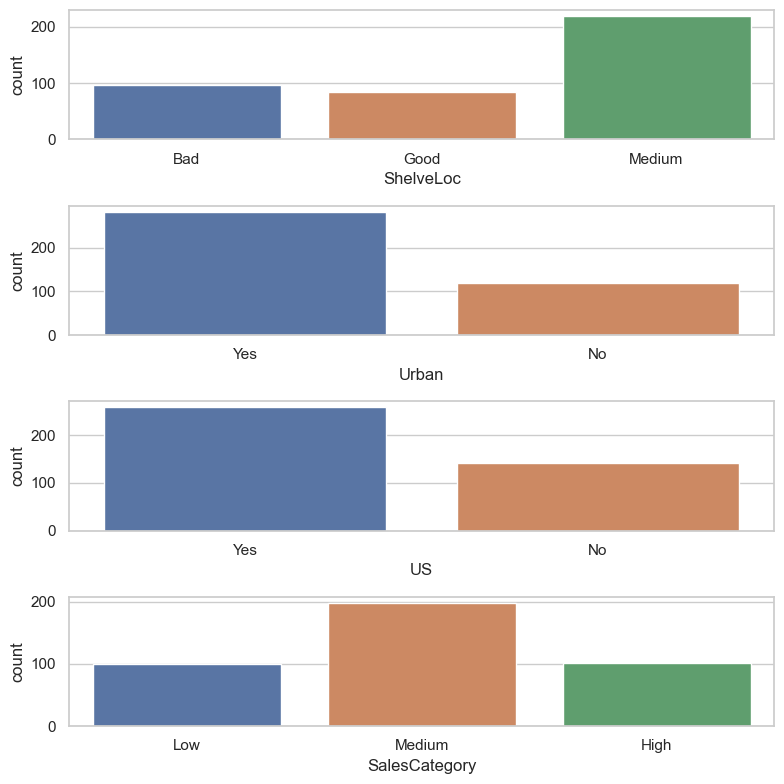

In [77]:
#Set the style for the plots (optional but can enhance the appearance)
sns.set(style="whitegrid")

# Create subplots for each categorical feature
fig,axes=plt.subplots(nrows=len(categorical_features),ncols=1,figsize=(8,8))
for i,column in enumerate(categorical_features):
    sns.countplot(data=Cloth_Data,x=column,ax=axes[i])  # Create a count plot for the current column
    axes[i].set_xlabel(column)  # Set the x-axis label for the current subplot

plt.tight_layout()  # Adjust subplot layout for readability
plt.show()

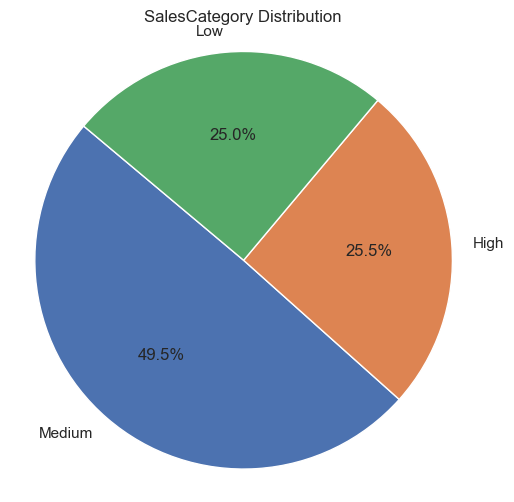

In [78]:
# Calculate the distribution of 'SalesCategory' values
category_counts=Cloth_Data['SalesCategory'].value_counts()

# Extract labels and sizes for the pie chart
labels=category_counts.index
sizes=category_counts.values

# Create a pie chart
plt.figure(figsize=(6,6))
plt.pie(sizes,labels=labels,autopct='%1.1f%%',startangle=140)
plt.title('SalesCategory Distribution')

# Display the pie chart
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular
plt.show()

<AxesSubplot:>

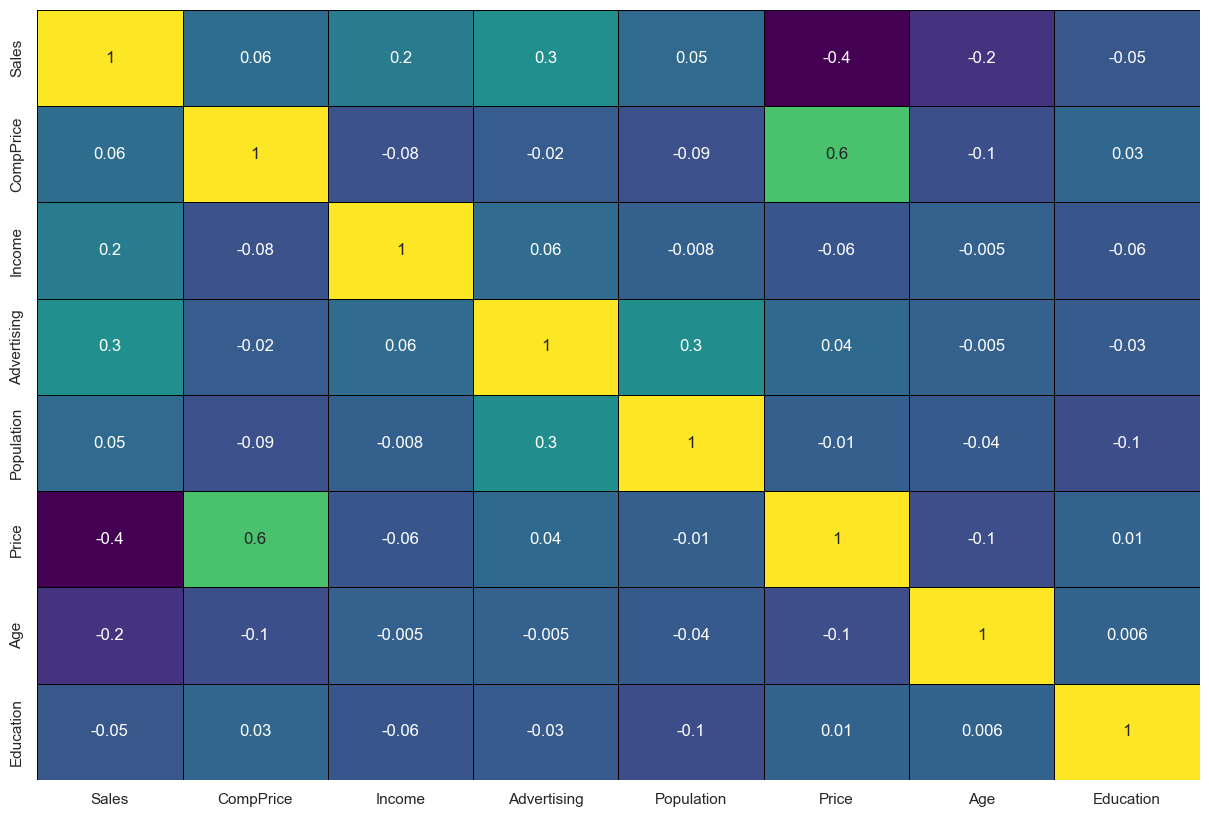

In [79]:
fig,ax=plt.subplots(figsize=(15,10))
sns.heatmap(Cloth_Data.corr(),annot=True,fmt='.1g',cmap="viridis",cbar=False,linewidths=0.5,linecolor='black')

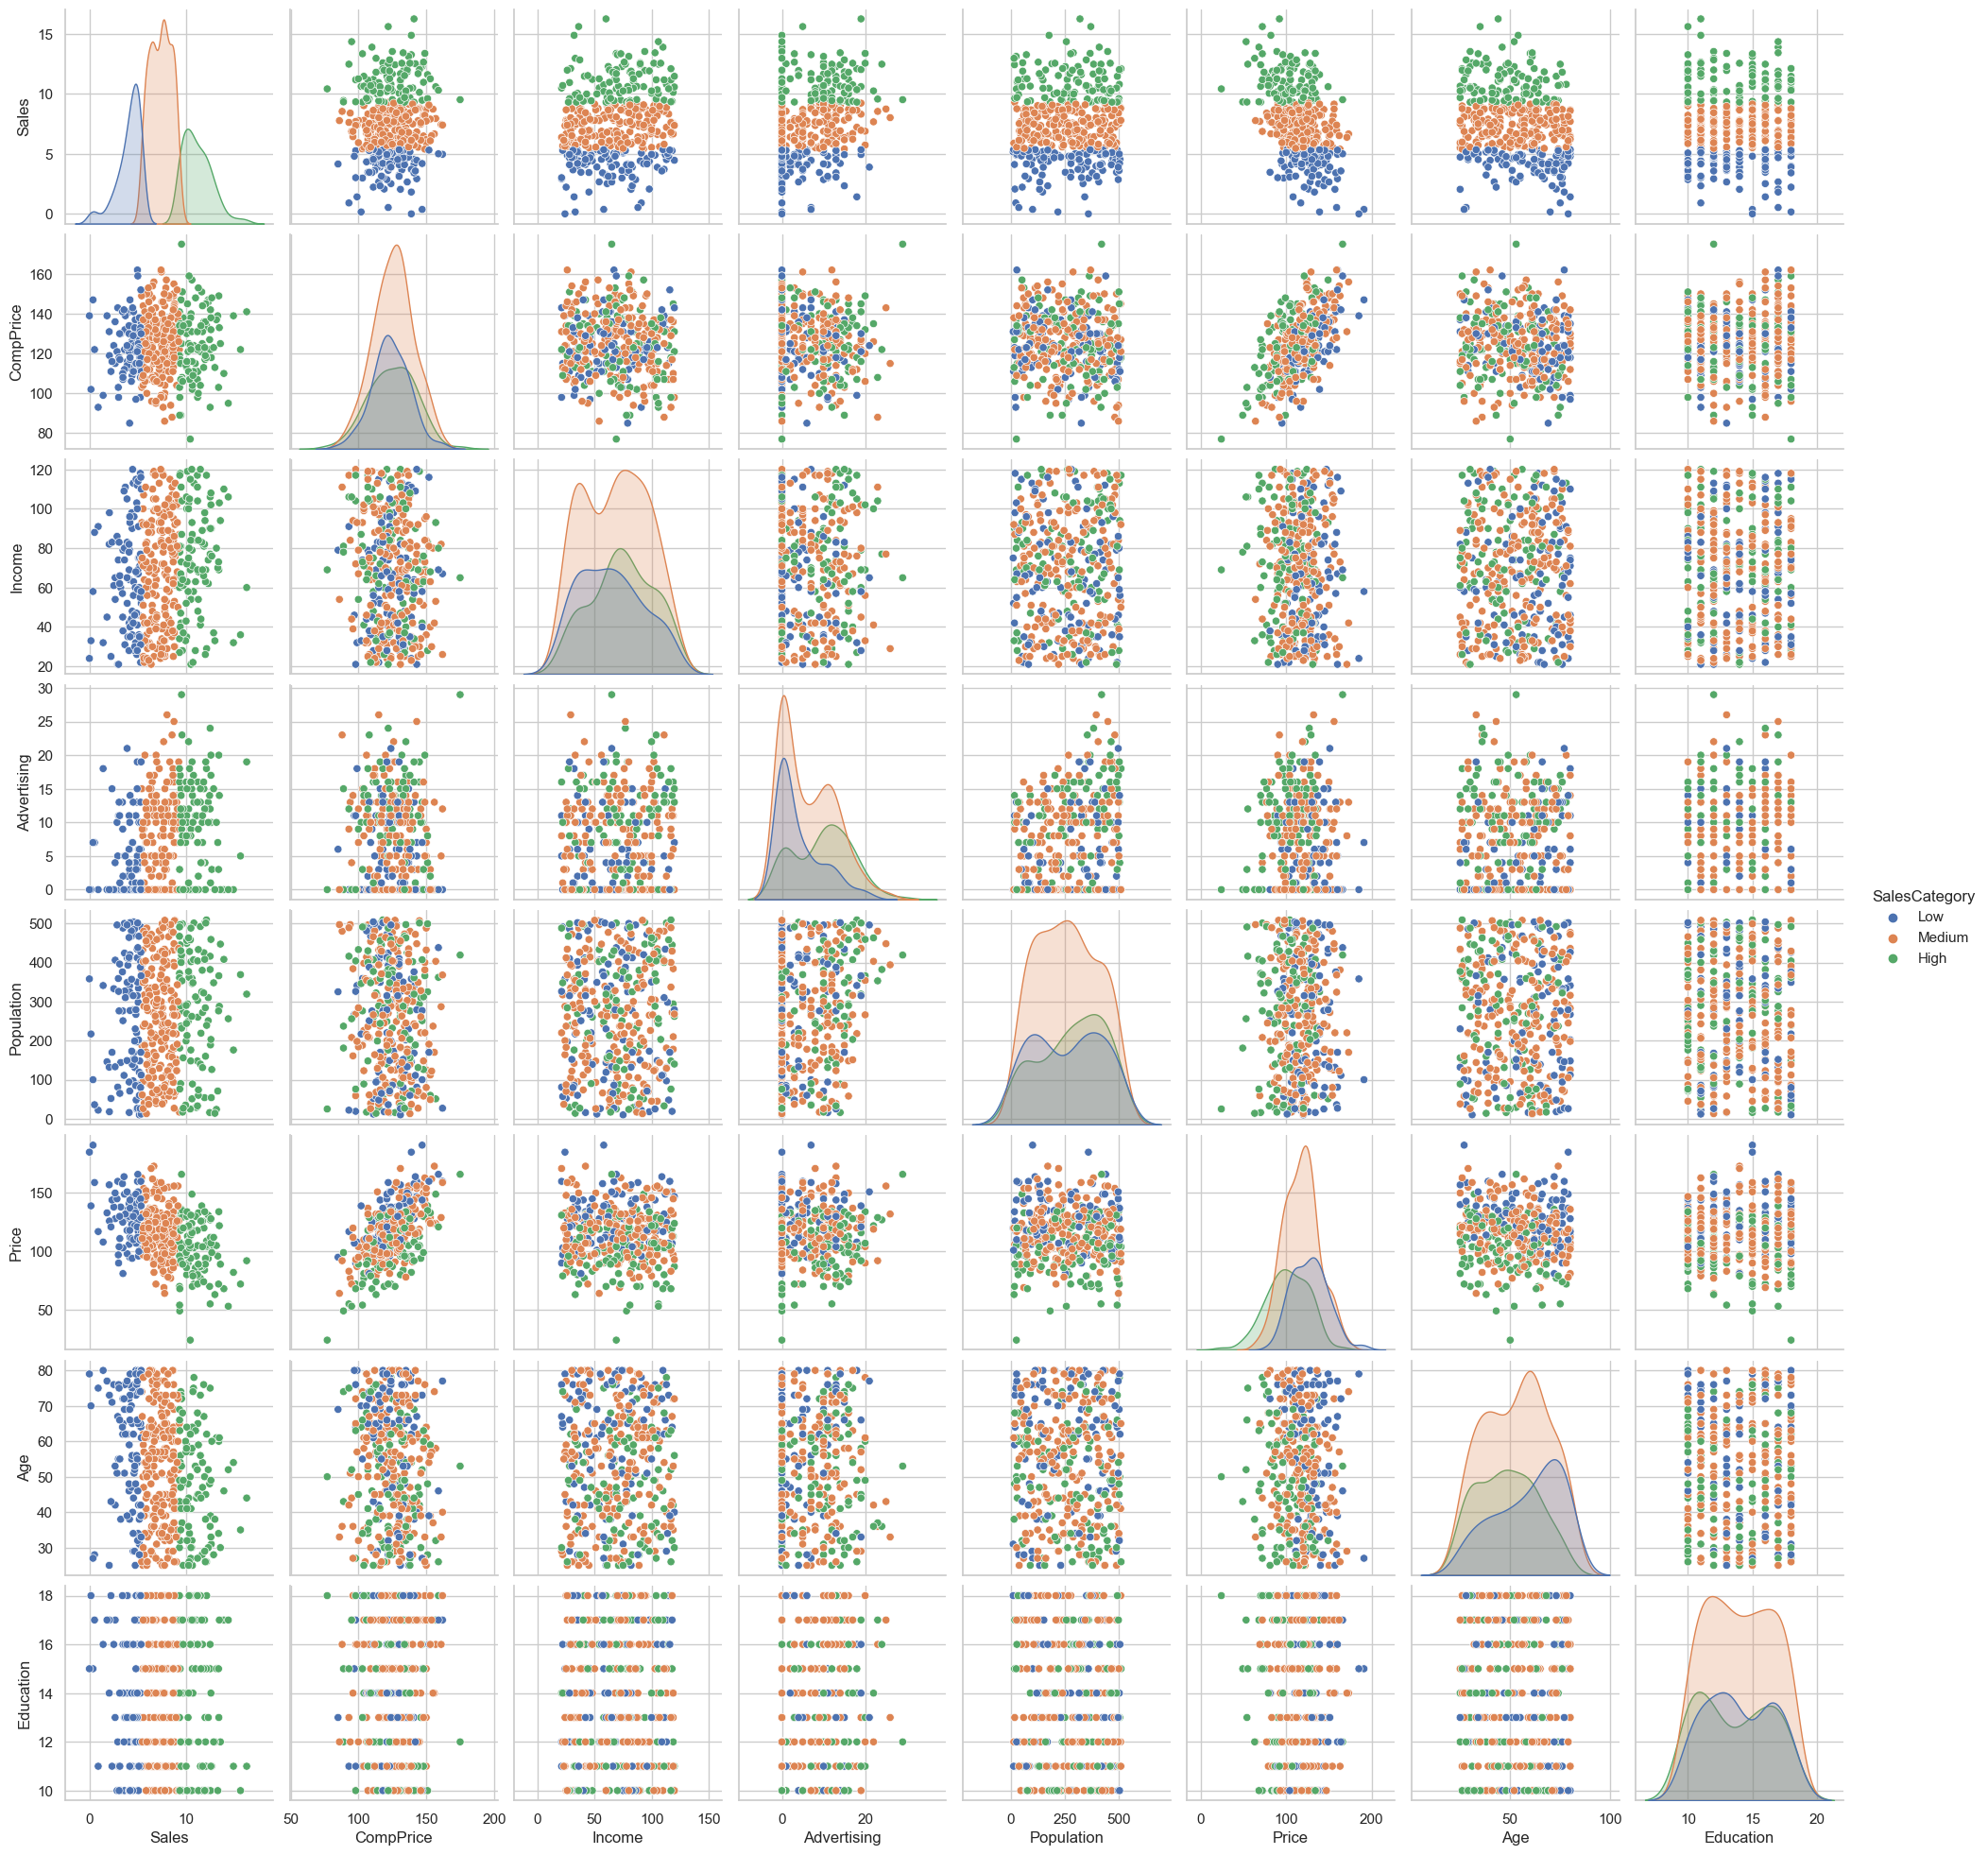

In [80]:
# let's plot pair plot to visualise the attributes all at once
sns.pairplot(data=Cloth_Data,hue='SalesCategory')

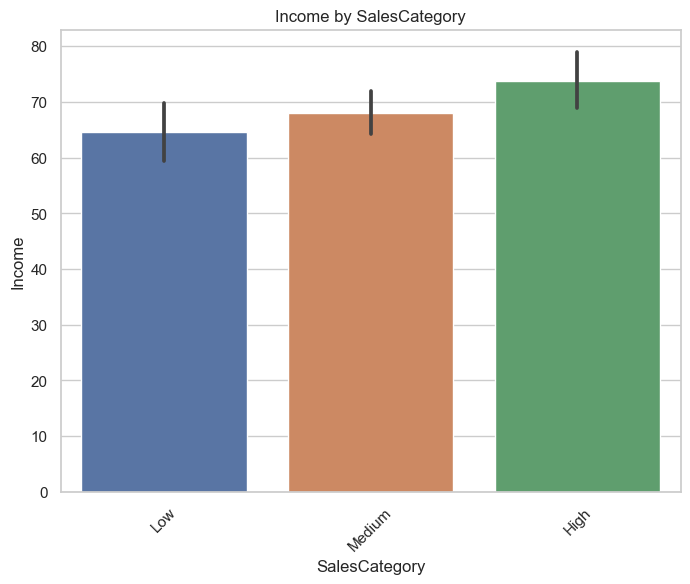

In [81]:
# Set the style for the plot (optional but can enhance the appearance)
sns.set(style="whitegrid")

# Create a box plot of 'Income' based on 'SalesCategory'
plt.figure(figsize=(8,6))
sns.barplot(data=Cloth_Data,x='SalesCategory',y='Income')
plt.title('Income by SalesCategory')

# Adjust the plot for readability
plt.xticks(rotation=45)  # Rotate x-axis labels if needed

# Display the plot
plt.show()

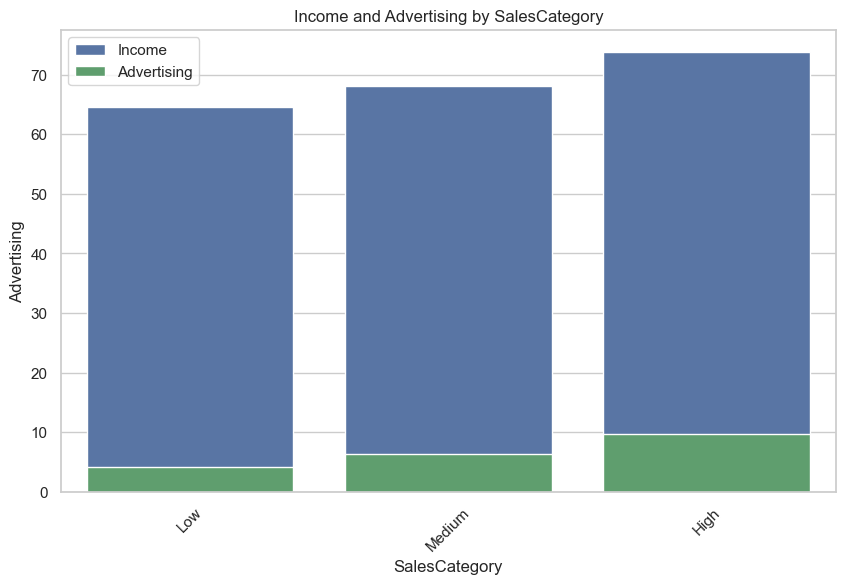

In [82]:
# Set the style for the plot (optional but can enhance the appearance)
sns.set(style="whitegrid")

# Create a grouped bar plot for 'Income' and 'Advertising' based on 'SalesCategory'
plt.figure(figsize=(10,6))
sns.barplot(data=Cloth_Data,x='SalesCategory',y='Income', ci=None, color='b', label='Income')
sns.barplot(data=Cloth_Data, x='SalesCategory', y='Advertising', ci=None, color='g', label='Advertising')
plt.title('Income and Advertising by SalesCategory')
plt.legend()

# Display the grouped bar chart
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()

In [83]:
Cloth_Data.drop(columns=['Sales'],inplace=True)

In [84]:
# Rename the 'SalesCategory' column to 'Sales'
Cloth_Data=Cloth_Data.rename(columns={'SalesCategory': 'Sales'})

In [85]:
Cloth_Data.head(2)

CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0        138      73           11         276    120       Bad   42   
1        111      48           16         260     83      Good   65   

   Education Urban   US Sales  
0         17   Yes  Yes  High  
1         10   Yes  Yes  High

In [86]:
# Perform one-hot encoding
Cloth_Data=pd.get_dummies(Cloth_Data,columns=['ShelveLoc','Urban','US'])

In [87]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder=LabelEncoder()

# Apply label encoding to the categorical column
Cloth_Data['Sales']=label_encoder.fit_transform(Cloth_Data['Sales'])

In [88]:
Cloth_Data.columns

Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age',
       'Education', 'Sales', 'ShelveLoc_Bad', 'ShelveLoc_Good',
       'ShelveLoc_Medium', 'Urban_No', 'Urban_Yes', 'US_No', 'US_Yes'],
      dtype='object')

In [89]:
# split into input (X) and output (y) variables
X =Cloth_Data.iloc[:, :-1]

y=Cloth_Data.Sales

In [90]:
#Feature importance
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest, chi2

In [91]:
# feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, y)

In [92]:
# summarize scores
scores = fit.scores_

features = fit.transform(X)

In [93]:
score_df = pd.DataFrame(list(zip(scores, X.columns)),
               columns =['Score', 'Feature'])
score_df.sort_values(by="Score", ascending=False, inplace=True)
score_df

Score           Feature
4   300.881058             Price
2   251.767458       Advertising
7   223.354839             Sales
3   141.113336        Population
5   106.577639               Age
9    66.174919    ShelveLoc_Good
1    65.145403            Income
8    48.524460     ShelveLoc_Bad
13   13.109136             US_No
10    8.654770  ShelveLoc_Medium
0     2.253637         CompPrice
6     0.689685         Education
11    0.163751          Urban_No
12    0.068520         Urban_Yes

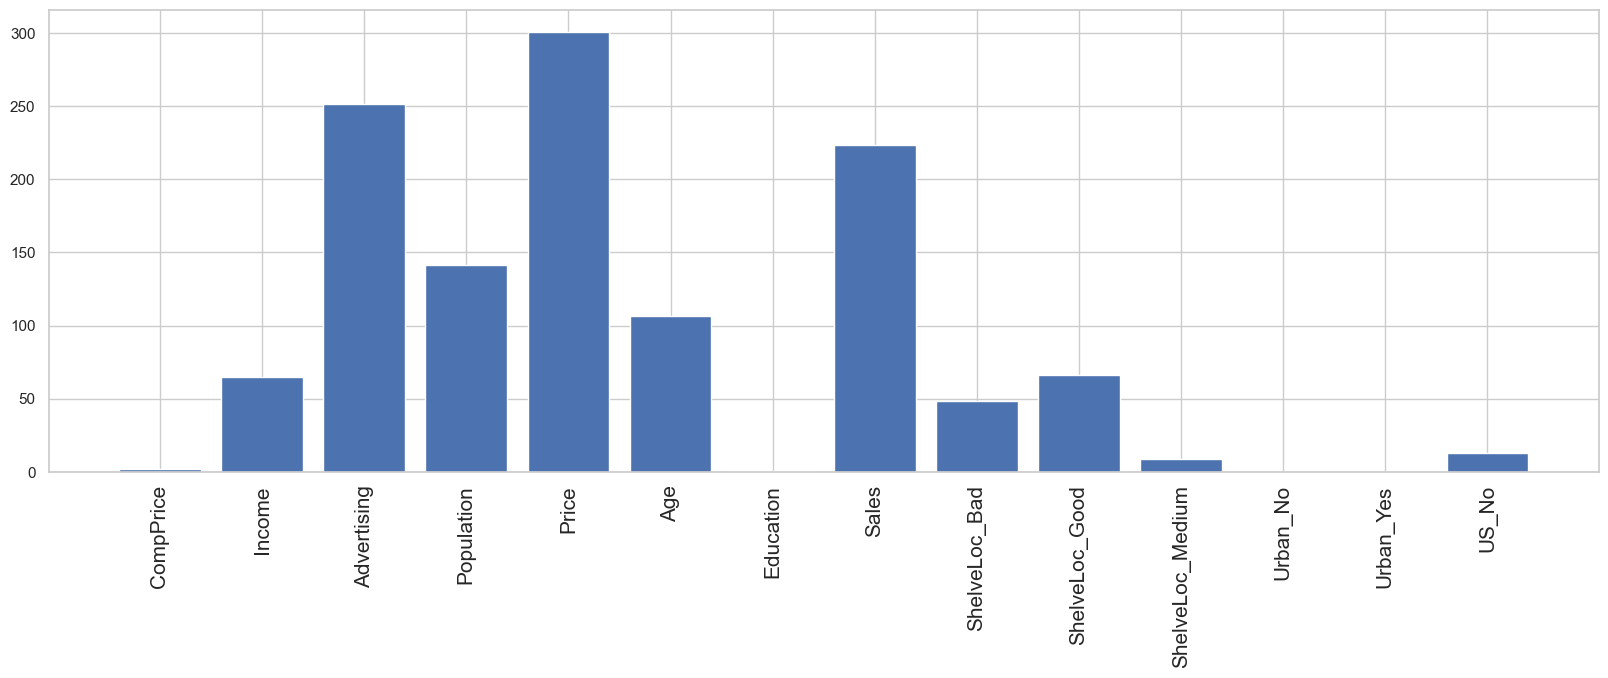

In [94]:
fig, axes = plt.subplots(figsize=(20, 6))
plt.bar([i for i in range(len(scores))],scores)
axes.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13])
axes.set_xticklabels(X.columns.values)
plt.xticks(rotation = 90, size = 15)
plt.show()

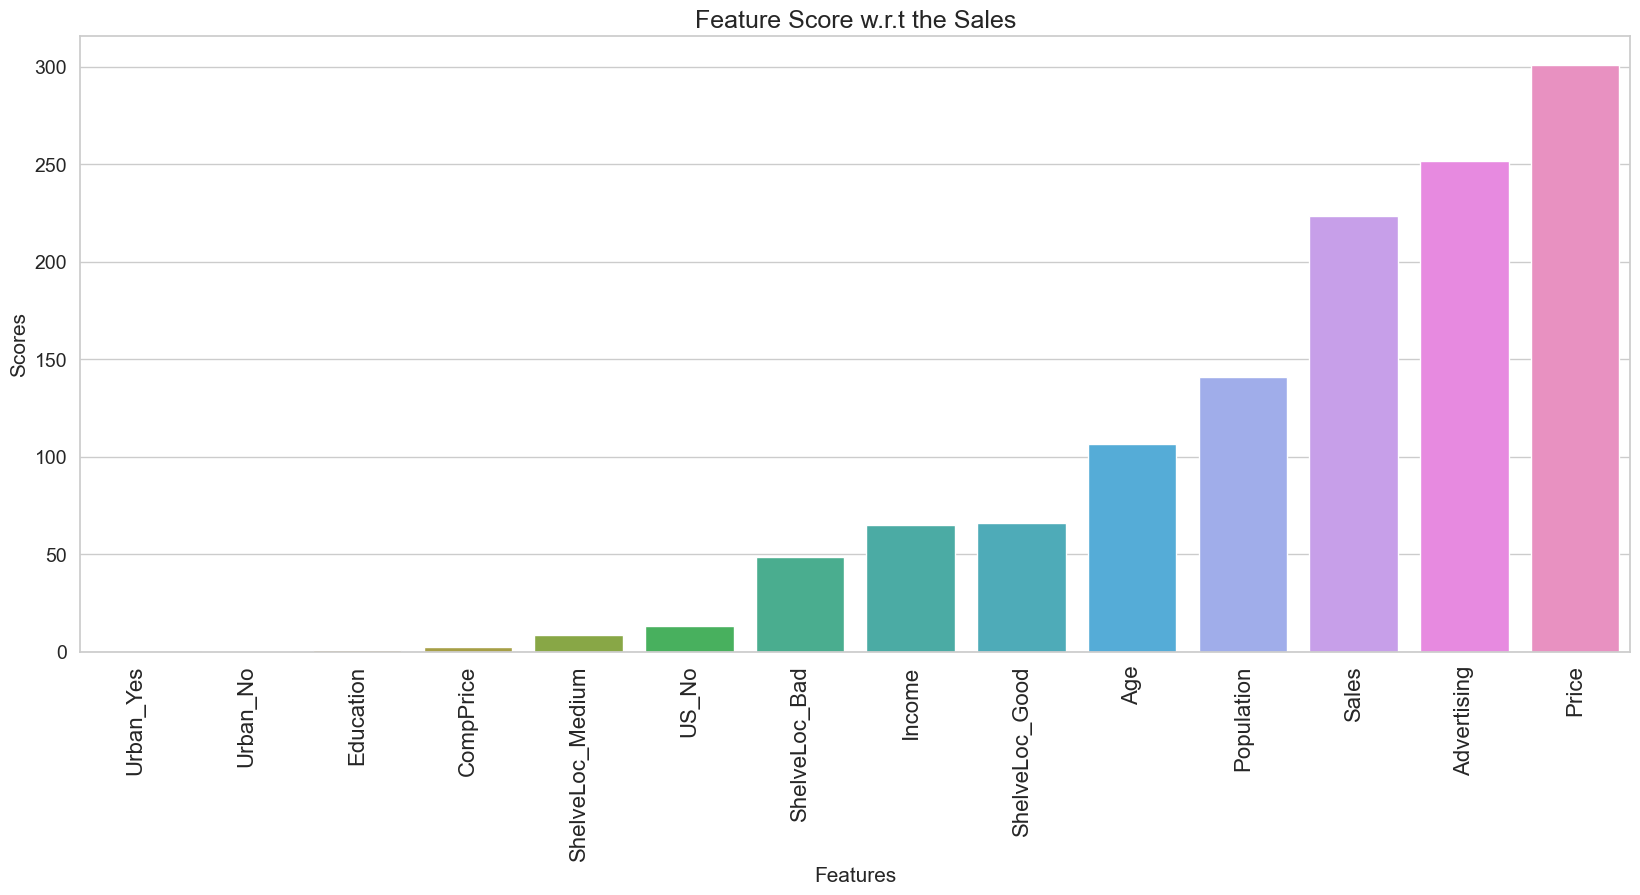

In [95]:
plt.figure(figsize=(20,8))
# make barplot and sort bars
sns.barplot(x='Feature',
            y="Score", 
            data=score_df, 
            order=score_df.sort_values('Score').Feature)
# set labels
plt.xlabel("Features", size=15)
plt.ylabel("Scores", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Feature Score w.r.t the Sales", size=18)
plt.show()

In [96]:
model_data=Cloth_Data[['Price', 'Advertising','Population', 'Income', 'Age', 'ShelveLoc_Good', 'ShelveLoc_Bad', 'ShelveLoc_Medium','Sales']]
model_data.head()

Price  Advertising  Population  Income  Age  ShelveLoc_Good  ShelveLoc_Bad  \
0    120           11         276      73   42               0              1   
1     83           16         260      48   65               1              0   
2     80           10         269      35   59               0              0   
3     97            4         466     100   55               0              0   
4    128            3         340      64   38               0              1   

   ShelveLoc_Medium  Sales  
0                 0      0  
1                 0      0  
2                 1      0  
3                 1      2  
4                 0      1

In [97]:
x = model_data.drop('Sales',axis=1)
y = model_data['Sales']

In [98]:
# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

# enumerate the splits and summarize the distributions
for train_ix, test_ix in skf.split(x, y):
# select rows
    train_X, test_X = x.iloc[train_ix], x.loc[test_ix]
    train_y, test_y = y.iloc[train_ix], y.iloc[test_ix]
# summarize train and test composition
counter_train = Counter(train_y)
counter_test = Counter(test_y)
print('Training Data',counter_train,'Testing Data',counter_test)

Training Data Counter({2: 178, 0: 92, 1: 90}) Testing Data Counter({2: 20, 0: 10, 1: 10})


In [99]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0,stratify=y)

In [100]:
# summarize train and test composition
counter_train = Counter(y_train)
counter_test = Counter(y_test)
print('Training Data',counter_train,'Testing Data',counter_test)

Training Data Counter({2: 139, 0: 71, 1: 70}) Testing Data Counter({2: 59, 0: 31, 1: 30})


In [101]:
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (280, 8)
Shape of X_test:  (120, 8)
Shape of y_train:  (280,)
Shape of y_test (120,)


#### Grid search using Stratified Kfold Splits on Imbalanced Dataset

In [102]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [103]:
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(train_X, train_y)

print_score(rf_clf, train_X, train_y, test_X, test_y, train=True)
print_score(rf_clf, train_X, train_y, test_X, test_y, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
              0     1      2  accuracy  macro avg  weighted avg
precision   1.0   1.0    1.0       1.0        1.0           1.0
recall      1.0   1.0    1.0       1.0        1.0           1.0
f1-score    1.0   1.0    1.0       1.0        1.0           1.0
support    92.0  90.0  178.0       1.0      360.0         360.0
_______________________________________________
Confusion Matrix: 
 [[ 92   0   0]
 [  0  90   0]
 [  0   0 178]]

Test Result:
Accuracy Score: 62.50%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1          2  accuracy  macro avg  weighted avg
precision   0.750000   0.666667   0.592593     0.625   0.669753      0.650463
recall      0.300000   0.600000   0.800000     0.625   0.566667      0.625000
f1-score    0.428571   0.631579   0.680851     0.625   0.580334      0.605463
support    10.000000  10.000000  20.0

#### Grid search using Train Test Splits Stratifying Target feature on Imbalanced Dataset

In [104]:
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(x_train, y_train)

print_score(rf_clf, x_train, y_train, x_test, y_test, train=True)
print_score(rf_clf, x_train, y_train, x_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
              0     1      2  accuracy  macro avg  weighted avg
precision   1.0   1.0    1.0       1.0        1.0           1.0
recall      1.0   1.0    1.0       1.0        1.0           1.0
f1-score    1.0   1.0    1.0       1.0        1.0           1.0
support    71.0  70.0  139.0       1.0      280.0         280.0
_______________________________________________
Confusion Matrix: 
 [[ 71   0   0]
 [  0  70   0]
 [  0   0 139]]

Test Result:
Accuracy Score: 64.17%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1          2  accuracy   macro avg  weighted avg
precision   0.760000   0.600000   0.614286  0.641667    0.658095      0.648357
recall      0.612903   0.500000   0.728814  0.641667    0.613906      0.641667
f1-score    0.678571   0.545455   0.666667  0.641667    0.630231      0.639439
support    31.000000  30.000000  

#### Handling imbalance data using SMOTE based techniques

In [105]:
#SMOTE Oversampling technique
counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE
smt = SMOTE()
x_train_sm, y_train_sm = smt.fit_resample(x_train, y_train)

counter = Counter(y_train_sm)
print('After',counter)

Before Counter({2: 139, 0: 71, 1: 70})
After Counter({2: 139, 1: 139, 0: 139})


In [106]:
# ADASYN: Adaptive Synthetic Sampling Approach
counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using ADASYN
ada = ADASYN(random_state=130)
x_train_ada, y_train_ada = ada.fit_resample(x_train, y_train)

counter = Counter(y_train_ada)
print('After',counter)

Before Counter({2: 139, 0: 71, 1: 70})
After Counter({1: 140, 2: 139, 0: 139})


In [107]:
#Hybridization: SMOTE + Tomek Links
counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE + Tomek
smtom = SMOTETomek(random_state=139)
x_train_smtom, y_train_smtom = smtom.fit_resample(x_train, y_train)

counter = Counter(y_train_smtom)
print('After',counter)

Before Counter({2: 139, 0: 71, 1: 70})
After Counter({0: 128, 1: 127, 2: 118})


In [108]:
#Hybridization: SMOTE + ENN
counter = Counter(y_train)
print('Before',counter)
#oversampling the train dataset using SMOTE + ENN
smenn = SMOTEENN()
x_train_smenn, y_train_smenn = smenn.fit_resample(x_train, y_train)

counter = Counter(y_train_smenn)
print('After',counter)

Before Counter({2: 139, 0: 71, 1: 70})
After Counter({0: 66, 1: 50, 2: 13})


#### Performance Analysis after Resampling

In [109]:
sampled_data = {
    'ACTUAL':[x_train, y_train],
    'SMOTE':[x_train_sm, y_train_sm],
    'ADASYN':[x_train_ada, y_train_ada],
    'SMOTE_TOMEK':[x_train_smtom, y_train_smtom],
    'SMOTE_ENN':[x_train_smenn, y_train_smenn]
}

In [110]:
def test_eval(clf_model, X_test, y_test, algo=None, sampling=None):
    # Test set prediction
    y_prob=clf_model.predict_proba(X_test)
    y_pred=clf_model.predict(X_test)

    print('Confusion Matrix')
    print('='*60)
    #plot_confusion_matrix(clf_model, X_test, y_test)  
    #plt.show() 
    print(confusion_matrix(y_test,y_pred),"\n")
    print('Classification Report')
    print('='*60)
    print(classification_report(y_test,y_pred),"\n")
    #print('AUC-ROC')
    #print('='*60)
    #print(roc_auc_score(y_test, y_prob[:,1], multi_class='ovo'))
    
    #x = roc_auc_score(y_test, y_prob[:,1])
    f1 = f1_score(y_test, y_pred, average='micro')
    recall = recall_score(y_test, y_pred, average='micro')
    precision = precision_score(y_test, y_pred, average='micro')
          
    
    return algo,precision,recall,f1,sampling

In [111]:
model_params = {

    'random-forest' : {
        'model' : RandomForestClassifier(),
        'params' : {
             "n_estimators": [5, 10, 15, 20, 25], 
             'max_depth': [i for i in range(5,16,2)],
             'min_samples_split': [2, 5, 10, 15, 20, 50, 100],
             'min_samples_leaf': [1, 2, 5],
             'criterion': ['gini', 'entropy'],
             'max_features': ['log2', 'sqrt', 'auto']

         }
    }
}

In [112]:
cv = StratifiedKFold(n_splits=5, random_state=100, shuffle=True)
output = []
for model , model_hp in model_params.items():
    for resam , data in sampled_data.items():
        clf = RandomizedSearchCV(model_hp['model'], model_hp['params'],cv = cv, scoring='roc_auc', n_jobs=-1 )
        clf.fit(data[0], data[1])
        clf_best = clf.best_estimator_
        print('x'*60)
        print(model+' with ' + resam)
        print('='*60)
        output.append(test_eval(clf_best, x_test, y_test, model, resam))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
random-forest with ACTUAL
Confusion Matrix
[[20  0 11]
 [ 0 14 16]
 [ 7  8 44]] 

Classification Report
              precision    recall  f1-score   support

           0       0.74      0.65      0.69        31
           1       0.64      0.47      0.54        30
           2       0.62      0.75      0.68        59

    accuracy                           0.65       120
   macro avg       0.67      0.62      0.64       120
weighted avg       0.66      0.65      0.65       120
 



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
random-forest with SMOTE
Confusion Matrix
[[22  2  7]
 [ 0 16 14]
 [ 5 19 35]] 

Classification Report
              precision    recall  f1-score   support

           0       0.81      0.71      0.76        31
           1       0.43      0.53      0.48        30
           2       0.62      0.59      0.61        59

    accuracy                           0.61       120
   macro avg       0.62      0.61      0.61       120
weighted avg       0.63      0.61      0.61       120
 



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
random-forest with ADASYN
Confusion Matrix
[[23  0  8]
 [ 1 15 14]
 [ 7 11 41]] 

Classification Report
              precision    recall  f1-score   support

           0       0.74      0.74      0.74        31
           1       0.58      0.50      0.54        30
           2       0.65      0.69      0.67        59

    accuracy                           0.66       120
   macro avg       0.66      0.65      0.65       120
weighted avg       0.66      0.66      0.66       120
 



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
random-forest with SMOTE_TOMEK
Confusion Matrix
[[22  2  7]
 [ 2 14 14]
 [14 11 34]] 

Classification Report
              precision    recall  f1-score   support

           0       0.58      0.71      0.64        31
           1       0.52      0.47      0.49        30
           2       0.62      0.58      0.60        59

    accuracy                           0.58       120
   macro avg       0.57      0.58      0.58       120
weighted avg       0.58      0.58      0.58       120
 

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
random-forest with SMOTE_ENN
Confusion Matrix
[[31  0  0]
 [30  0  0]
 [59  0  0]] 

Classification Report
              precision    recall  f1-score   support

           0       0.26      1.00      0.41        31
           1       0.00      0.00      0.00        30
           2       0.00      0.00      0.00        59

    accuracy                           0.26       120
   macr

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 i

In [113]:
print('Before',counter)
# oversampling the train dataset using ADASYN
ada = ADASYN(random_state=130)
x_train_ada, y_train_ada = ada.fit_resample(x_train, y_train)

counter = Counter(y_train_ada)
print('After',counter)

Before Counter({0: 66, 1: 50, 2: 13})
After Counter({1: 140, 2: 139, 0: 139})


In [114]:
x_train,x_test,y_train,y_test = train_test_split(x_train_ada,y_train_ada,test_size=0.3,random_state=0, stratify=y_train_ada)

counter = Counter(y_train_ada)
print('Before',counter)
counter = Counter(y_train)
print('After',counter)
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Before Counter({1: 140, 2: 139, 0: 139})
After Counter({1: 98, 0: 97, 2: 97})
Shape of X_train:  (292, 8)
Shape of X_test:  (126, 8)
Shape of y_train:  (292,)
Shape of y_test (126,)


#### Random Forest hyperparameter tuning

In [115]:
score_array = []
for each in range(1,200):
    rf_loop = RandomForestClassifier(n_estimators = each, random_state = 1) 
    rf_loop.fit(x_train,y_train)
    score_array.append(rf_loop.score(x_test,y_test))

In [116]:
loc = np.array(score_array).max()
score_array.index(loc)+1

42

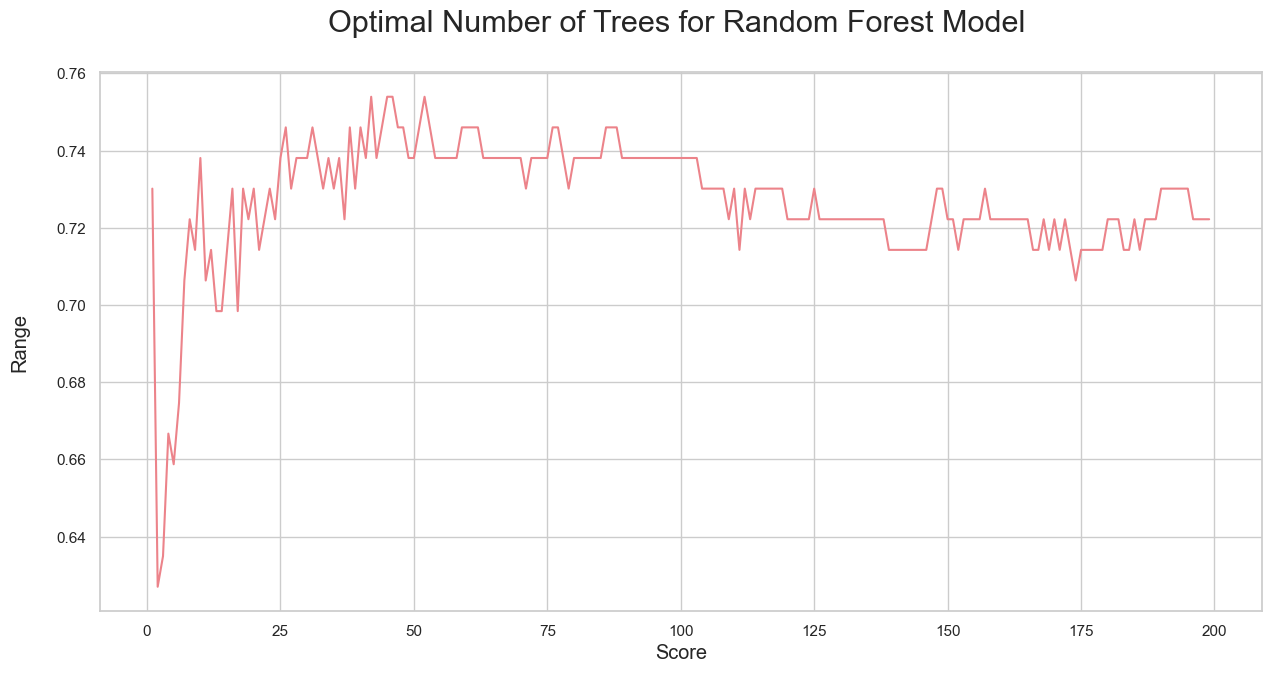

In [117]:
fig = plt.figure(figsize=(15, 7))
plt.plot(range(1,200),score_array, color = '#ec838a')
plt.ylabel('Range\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.xlabel('Score\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.title('Optimal Number of Trees for Random Forest Model \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
#plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

#### Randomized Search Cross Validation

In [118]:
n_estimators = [int(x) for x in np.linspace(start=0, stop=200, num=200)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf = RandomForestClassifier(random_state=42)

rf_cv = RandomizedSearchCV(estimator=rf_clf, scoring='f1',param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)

rf_cv.fit(x_train, y_train)
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")

rf_clf = RandomForestClassifier(**rf_best_params)
rf_clf.fit(x_train, y_train)

print_score(rf_clf, x_train, y_train, x_test, y_test, train=True)
print_score(rf_clf, x_train, y_train, x_test, y_test, train=False)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Best paramters: {'n_estimators': 195, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 50, 'bootstrap': True})
Train Result:
Accuracy Score: 91.44%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1          2  accuracy   macro avg  weighted avg
precision   0.937500   0.881818   0.930233  0.914384    0.916517      0.916398
recall      0.927835   0.989796   0.824742  0.914384    0.914124      0.914384
f1-score    0.932642   0.932692   0.874317  0.914384    0.913217      0.913284
support    97.000000  98.000000  97.000000  0.914384  292.000000    292.000000
_______________________________________________
Confusion Matrix: 
 [[90  2  5]
 [ 0 97  1]
 [ 6 11 80]]

Test Result:
Accuracy Score: 71.43%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1          2  accuracy   macro avg  weighted avg
precision   0.846154   0.685185   0.606061  0.714286    0.7